<a href="https://colab.research.google.com/github/Lia13/mpv_analise_de_dados/blob/main/MPV_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto MPV - Análise de Dados - Lilian Cunha Galdino
##Identificação dos Fatores de Risco para Óbitos por SRAG, Incluindo COVID-19

#### Definição do Problema

##### **1. Descrição do Problema**
O objetivo da análise consiste em identificar os principais fatores de risco que estão mais fortemente associados ao óbito em pacientes com SRAG (Síndrome Respiratória Aguda Grave), incluindo os casos causados pela COVID-19. Isso inclui fatores demográficos (idade, gênero), comorbidades (hipertensão, diabetes, doenças cardíacas, etc.), e a influência de aspectos como vacinação e internação em UTI.

##### **2. Premissas ou Hipóteses**

Premissas
* **Dados Completo e Preciso**: O dataset possui informações suficientes e precisas sobre variáveis-chave (idade, gênero, comorbidades, vacinação, etc.).
* **Precisão dos Registros**: Os diagnósticos e desfechos clínicos foram registrados de forma consistente.
* **Informações de Vacinação**: O dataset inclui dados sobre o status de vacinação dos pacientes.
* **Representatividade Geográfica**: O dataset representa adequadamente diferentes regiões e populações do Brasil.

Hipóteses
* **Idade e Mortalidade**: Pacientes mais velhos têm maior risco de óbito.
* **Comorbidades**: Pacientes com comorbidades (diabetes, hipertensão, etc.) têm maior risco de mortalidade.
* **Vacinação**: A vacinação reduz significativamente o risco de óbito.
* **Sexo**: Homens têm maior risco de complicações graves e óbito do que mulheres.
* **Localização Geográfica**: Áreas com menor infraestrutura de saúde têm maior taxa de mortalidade.
* **Sazonalidade**: A mortalidade aumenta durante o inverno.
* **Internação em UTI**: Pacientes que precisam de UTI ou ventilação mecânica têm maior risco de óbito.


##### **3. Restrições ou Condições de Seleção de Dados**

* Consistência dos dados: O dataset foi selecionado devido à sua robustez e confiabilidade, apresentando dados consistentes, com registros padronizados e bem documentados, o que permite análises de maior qualidade e menos problemas com dados faltantes ou incorretos.

* Quantidade de informações: O SRAG do DataSUS possui uma vasta quantidade de dados, com diversas variáveis relevantes que proporcionam uma análise mais rica e abrangente. Isso contrasta com a opção anterior de um dataset menor sobre saúde do sono, que continha menos informações.

* Relevância e importância social: A escolha pelo dataset SRAG também foi motivada pela sua importância no contexto atual, já que as informações tratam de casos graves de doenças respiratórias, um tema de grande impacto na saúde pública.

* Nível de complexidade: O SRAG, por ser um dataset maior e mais complexo, ofereceu um desafio analítico mais elevado, exigindo uma maior preparação e atenção nas etapas de limpeza e modelagem dos dados.



##### **4. Definição dos Atributos do Dataset**

• Datas:
- `DT_NOTIFIC` (Data da Notificação)
- `DT_SIN_PRI` (Data do Início dos Sintomas)
- `DT_NASC` (Data de Nascimento)
- `DT_INTERNA` (Data de Internação)
- `DT_EVOLUCA` (Data de Evolução)
- `DT_ENCERRA` (Data de Encerramento do Caso)

• Dados Demográficos:
- `SG_UF` (Unidade Federativa)
- `ID_MN_RESI` (ID Município de Residência)
- `CS_SEXO` (Sexo)
- `NU_IDADE_N` (Idade Numérica)
- `TP_IDADE` (Tipo de Idade: anos, meses, dias)
- `CS_GESTANT` (Gestante)
- `CS_RACA` (Raça/Cor)

• Sintomas e Condições de Saúde:
- **Sintomas:**
  - `FEBRE` (Febre)
  - `TOSSE` (Tosse)
  - `GARGANTA` (Dor de Garganta)
  - `DISPNEIA` (Dificuldade para Respirar)
  - `DESC_RESP` (Desconforto Respiratório)
  - `SATURACAO` (Baixa Saturação de Oxigênio)
  - `DIARREIA` (Diarreia)
  - `VOMITO` (Vômito)
  - `DOR_ABD` (Dor Abdominal)
  - `FADIGA` (Fadiga)
  - `OUTRO_SIN` (Outros Sintomas)
  - `PERD_OLFT` (Perda de Olfato)
  - `PERD_PALA` (Perda de Paladar)

- **Condições de Saúde (Fatores de Risco):**
  - `FATOR_RISC` (Presença de Fator de Risco)
  - `CARDIOPATI` (Cardiopatia)
  - `HEMATOLOGI` (Doença Hematológica)
  - `SIND_DOWN` (Síndrome de Down)
  - `HEPATICA` (Doença Hepática)
  - `ASMA` (Asma)
  - `DIABETES` (Diabetes)
  - `NEUROLOGIC` (Doença Neurológica)
  - `PNEUMOPATI` (Doença Pulmonar)
  - `IMUNODEPRE` (Imunodeprimido)
  - `RENAL` (Doença Renal)
  - `OBESIDADE` (Obesidade)

• Outros Fatores Relacionados ao Caso:
- `VACINA` (Recebeu Vacina da Gripe)
- `VACINA_COV` (Recebeu Vacina contra COVID-19)
- `UTI` (Internado em UTI)
- `SUPORT_VEN` (Suporte Ventilatório)
- `CLASSI_FIN` (Classificação Final do Caso)
- `EVOLUCAO` (Evolução do Paciente: Cura, Óbito, etc.)


##### **5.Este é um problema de aprendizado supervisionado ou não supervisionado?**

Ambos podem ser ultilizados, um exemplo de aprendizado supersionado seria: Prever ou identificar fatores de risco específicos que estão associados a um desfecho (cura ou óbito).

E um exemplo de não supervisionado seria: Explorar e identificar padrões ou grupos de dados sem usar rótulos predefinidos para desfechos.

#### Etapa de Importação


---

O **dataset SRAG** é composto por arquivos CSV hospedados em um link público do Google Drive. Cada um desses arquivos representa um ano e contém mais de **200.000 linhas** e cerca de **190 colunas**, resultando em um conjunto de dados considerávelmente pesado.

Para evitar tempos excessivos de carregamento e processamento, e garantir uma melhor eficiência, o dataset será trabalhado por amostras, selecionando **1000 linhas aleatórias de cada ano**. Com essa abordagem, o dataset final resultará em **4000 linhas**. Além disso, foram selecionadas apenas **45 colunas**, aquelas que são essenciais para a análise, visando também um desempenho otimizado.

In [1]:
# bibliotecas importadas
import gdown
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [2]:
# Importante: Essa célula é a unica que apresenta demora para carregar, leva cerca de 1 min.
# Lista dos IDs dos arquivos no Google Drive
arquivos_drive = {
    '2021': '1gpFM84vEE7FL4zCKP7gYaNp5nGCTYo3c',
    '2022': '1czGZE5F4pHA1ykUwvhwUguezLpD8t7Ck',
    '2023': '1lZTDCue8rWLdhGcuLQ9KNqtRrk-rK4CV',
    '2024': '18BZMGAKriL2nkD-ongUC458NRg4swD3a'
}

# Colunas selecionadas
selecionar_colunas = ['DT_NOTIFIC', 'DT_SIN_PRI', 'SG_UF', 'ID_MN_RESI', 'CS_SEXO',
                      'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'DOR_ABD', 'FADIGA',
                      'FEBRE', 'TOSSE', 'GARGANTA',	'DISPNEIA',	'DESC_RESP',	'SATURACAO',	'DIARREIA',	'VOMITO',	'OUTRO_SIN',	'PERD_OLFT', 'PERD_PALA',	'FATOR_RISC',
                      'CARDIOPATI', 'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL',	'OBESIDADE',
                      'VACINA', 'VACINA_COV', 'DT_INTERNA', 'UTI', 'SUPORT_VEN', 'CLASSI_FIN', 'EVOLUCAO', 'DT_EVOLUCA', 'DT_ENCERRA']




# Colunas que são datas
date_columns = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_INTERNA', 'DT_EVOLUCA', 'DT_ENCERRA']


# Lista para armazenar os DataFrames
dfs = []

# Loop para baixar e carregar cada arquivo
for ano, file_id in arquivos_drive.items():
    # URL para download + id
    url = f'https://drive.google.com/uc?id={file_id}'

    # Nome do arquivo de saída
    output = f'INFLUD_{ano}.csv'

    if not os.path.exists(output):
        # Baixa o arquivo apenas se não existir localmente
        gdown.download(url, output, quiet=False)

    # Leitura do arquivo CSV e seleção das colunas especificadas
    df = pd.read_csv(output, sep=';', usecols=selecionar_colunas, parse_dates=date_columns, dayfirst=True)

    # Filtrar as linhas onde 'EVOLUCAO' e 'CLASSI_FIN' não estão nulos
    df = df[df['EVOLUCAO'].notna() & df['CLASSI_FIN'].notna()]

    # Verifica se o arquivo tem pelo menos 1000 linhas
    if len(df) >= 1000:
        # Seleciona 1000 linhas aleatórias
        df = df.sample(n=1000, random_state=47)
    else:
        print(f"O arquivo {output} tem menos de 1000 linhas. Selecionando todas as linhas.")

    # Adiciona uma coluna com o ano
    df['Ano'] = int(ano)

    # Adiciona o DataFrame à lista
    dfs.append(df)

# Combinando todos os DataFrames em um único DataFrame
SRAG = pd.concat(dfs, ignore_index=True)

# Quantidade de linhas do DataFrame final
print(f'Total de linhas no DataFrame: {len(SRAG)}')

Downloading...
From (original): https://drive.google.com/uc?id=1gpFM84vEE7FL4zCKP7gYaNp5nGCTYo3c
From (redirected): https://drive.google.com/uc?id=1gpFM84vEE7FL4zCKP7gYaNp5nGCTYo3c&confirm=t&uuid=8eac4260-fe17-477a-91ad-6914a6bb0039
To: /content/INFLUD_2021.csv
100%|██████████| 1.02G/1.02G [00:21<00:00, 46.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1czGZE5F4pHA1ykUwvhwUguezLpD8t7Ck
From (redirected): https://drive.google.com/uc?id=1czGZE5F4pHA1ykUwvhwUguezLpD8t7Ck&confirm=t&uuid=f22a4997-a2f7-4a7d-bcdc-3520d522693f
To: /content/INFLUD_2022.csv
100%|██████████| 380M/380M [00:04<00:00, 93.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1lZTDCue8rWLdhGcuLQ9KNqtRrk-rK4CV
From (redirected): https://drive.google.com/uc?id=1lZTDCue8rWLdhGcuLQ9KNqtRrk-rK4CV&confirm=t&uuid=be146d16-1309-4b2b-ab1d-1447473e9e1c
To: /content/INFLUD_2023.csv
100%|██████████| 208M/208M [00:01<00:00, 125MB/s]
<ipython-input-2-154bb38b3bfe>:40: DtypeWarning: Columns (10

Total de linhas no DataFrame: 4000


1. **Leitura e Processamento Individual de Cada Arquivo**:
   - Para cada ano, o arquivo correspondente é baixado do Google Drive usando a função `gdown.download()`.
   - Após o download, o arquivo CSV é lido usando `pd.read_csv()`, onde apenas as colunas especificadas na lista `selecionar_colunas` são carregadas, e as colunas com datas (definidas em `date_columns`) são automaticamente convertidas para o formato de data.
   - Em seguida, o DataFrame de cada ano é filtrado para garantir que as colunas `EVOLUCAO` e `CLASSI_FIN` não tenham valores nulos (usando `df[df['EVOLUCAO'].notna() & df['CLASSI_FIN'].notna()]`).
   - Se o arquivo contém pelo menos 1000 linhas, são selecionadas aleatoriamente 1000 linhas para representar aquele ano. Caso contrário, todas as linhas são mantidas.
   - Cada DataFrame resultante recebe uma nova coluna chamada `Ano`, que armazena o ano correspondente ao arquivo.

2. **Combinação dos DataFrames**:
   - À medida que os arquivos de cada ano são processados, os DataFrames individuais são armazenados na lista `dfs`.
   - Após o loop sobre todos os arquivos, a função `pd.concat()` é utilizada para combinar todos os DataFrames da lista `dfs` em um único DataFrame chamado `SRAG`.
   - O parâmetro `ignore_index=True` é utilizado no `pd.concat()` para garantir que os índices das linhas sejam renumerados de forma sequencial no DataFrame final, ignorando os índices originais de cada DataFrame individual.

In [3]:
# Criando variavies para analises futuras
colunas_numericas = SRAG.select_dtypes(include=['float64', 'int64']).columns
colunas_categoricas = SRAG.select_dtypes(include=['category', 'string', 'object']).columns

#### Estátisticas Descritivas

#####Quantidade de atributos e instâncias:

In [4]:
# exibindo as dimensões do dataset
SRAG.shape

(4000, 45)

##### Tipo de dado de cada atributo:

In [5]:
# verificando os tipos de cada coluna do dataframe
SRAG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DT_NOTIFIC  4000 non-null   datetime64[ns]
 1   DT_SIN_PRI  4000 non-null   datetime64[ns]
 2   CS_SEXO     4000 non-null   object        
 3   DT_NASC     3999 non-null   datetime64[ns]
 4   NU_IDADE_N  4000 non-null   int64         
 5   TP_IDADE    4000 non-null   int64         
 6   CS_GESTANT  4000 non-null   int64         
 7   CS_RACA     4000 non-null   float64       
 8   SG_UF       3999 non-null   object        
 9   ID_MN_RESI  3999 non-null   object        
 10  FEBRE       3402 non-null   float64       
 11  TOSSE       3591 non-null   float64       
 12  GARGANTA    2863 non-null   float64       
 13  DISPNEIA    3457 non-null   float64       
 14  DESC_RESP   3302 non-null   float64       
 15  SATURACAO   3325 non-null   float64       
 16  DIARREIA    2837 non-nul

##### Verificando as primeiras e últimas linhas

Os seguintes pontos foram observados:

- Valores Nulos:

    Existem valores **nulos** presente nas duas amostras, especialmente nas colunas DT_EVOLUCA e DT_ENCERRA. Isso sugere que a ausência de registros para datas de evoluções e encerramentos de casos é um problema recorrente.

- Dados de Idade:

    É notável a presença de registros com idades que podem **não estar coerentes** na coluna NU_IDADE.

- Distribuição de Gênero:

    Na coluna CS_SEXO é possivel notar uma predominância do gênero masculino tanto nas primeiras quanto nas últimas linhas.

- Evolução dos Casos:

    A coluna EVOLUCAO se **mantém** com os valores similares tanto nas primeiras quanto nas últimas linhas, sendo a maioria deles 1 (Cura).

- Uniformidade dos Municípios:

    Os dados abrangem **diferentes** estados e municípios (como mostrado nas colunas SG_UF e ID_MUNICIP).

- Datas e Frequência:

    As colunas de data (DT_NOTIFIC e DT_SIN_PRI) parecem seguir um **padrão** de notificação e primeiros sintomas.


In [6]:
# exibindo as primeiras linhas
SRAG.head()

,DT_NOTIFIC,DT_SIN_PRI,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,SG_UF,ID_MN_RESI,...,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,Ano
0,2021-11-06,2021-11-06,M,1988-07-30,33,3,6,9.0,BA,LAURO DE FREITAS,...,5.0,1.0,NaT,2022-08-17,NaN,NaN,NaN,NaN,2.0,2021
1,2021-02-11,2021-02-05,F,1957-06-06,63,3,5,1.0,PR,CURITIBA,...,4.0,1.0,2021-02-14,2021-02-17,2.0,2.0,2.0,2.0,NaN,2021
2,2021-03-03,2021-02-24,M,1981-11-27,39,3,6,1.0,RS,IJUI,...,5.0,1.0,2021-03-03,2021-03-09,NaN,NaN,NaN,NaN,1.0,2021
3,2021-05-18,2021-04-28,M,1952-10-28,68,3,6,4.0,MA,SAO JOSE DE RIBAMAR,...,5.0,1.0,2021-05-07,2021-05-18,2.0,2.0,2.0,2.0,NaN,2021
4,2021-09-27,2021-09-23,M,1982-11-03,38,3,6,4.0,PR,CAMPO MOURAO,...,4.0,1.0,2021-09-28,2021-09-29,2.0,2.0,2.0,2.0,1.0,2021


In [7]:
# exibindo as últimas linhas
SRAG.tail()

,DT_NOTIFIC,DT_SIN_PRI,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,SG_UF,ID_MN_RESI,...,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,Ano
3995,2024-07-01,2024-07-01,M,1971-11-12,52,3,6,9.0,BA,ITAPETINGA,...,4.0,9.0,NaT,NaT,1.0,1.0,2.0,2.0,1.0,2024
3996,2024-04-02,2024-03-28,F,2024-02-16,1,2,6,9.0,SP,CAMPINAS,...,4.0,1.0,2024-04-07,2024-04-12,2.0,2.0,2.0,2.0,2.0,2024
3997,2024-05-15,2024-05-14,F,2015-06-01,8,3,6,1.0,SP,MARILIA,...,4.0,1.0,2024-05-15,2024-06-14,2.0,2.0,2.0,2.0,1.0,2024
3998,2024-06-26,2024-06-21,M,2016-02-05,8,3,6,4.0,RJ,PETROPOLIS,...,4.0,1.0,2024-07-03,2024-07-04,2.0,2.0,2.0,2.0,1.0,2024
3999,2024-05-12,2024-05-04,M,2021-09-04,2,3,6,1.0,PE,PAULISTA,...,4.0,1.0,2024-05-14,2024-05-14,1.0,NaN,NaN,NaN,1.0,2024


#####Resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes).

Alguns pontos observados:

Contagem (Count): É possível notar que há colunas com dados ausentes.

Mínimo e Máximo (Min, Max): NU_IDADE_N varia de 0 até 103 anos. Também conseguindo validar se as datas estão coerentes com os arquivos (não ser menor que 2021 e nem maior que 2024)

Média (Mean): NU_IDADE_N (39.9 anos) fornece uma noção geral da idade média dos indivíduos no dataset.

Desvio padrão (Std): Um desvio maior, como em NU_IDADE_N (32.3), indica que há uma grande variação nas idades dos indivíduos.

Mediana (50%): NU_IDADE_N em 43, mostra que metade dos indivíduos tem idade menor que 43 anos.

Distribuição de categorias: Para colunas categóricas como TP_IDADE, podemos ver que o valor mais comum (mediana) é 3, significando que a maioria das idades está em anos.

In [8]:
# exibindo um sumário estatístico --include='all'
SRAG.describe()

,DT_NOTIFIC,DT_SIN_PRI,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,FEBRE,TOSSE,GARGANTA,...,SUPORT_VEN,CLASSI_FIN,DT_EVOLUCA,DT_ENCERRA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,Ano
count,4000,4000,3999,4000.000000,4000.00000,4000.000000,4000.000000,3402.000000,3591.000000,2863.000000,...,3507.000000,4000.000000,3729,3947,2805.000000,2884.000000,2801.000000,2802.000000,3746.000000,4000.000000
mean,2022-11-23 17:45:14.400000,2022-11-15 14:11:45.600000,1983-04-01 13:27:19.309827456,39.939500,2.82750,5.799250,3.379250,1.430923,1.263436,2.047503,...,2.370402,3.928750,2022-11-26 09:09:07.385358080,2022-12-22 02:13:31.755763968,2.158645,1.956657,2.284184,2.289436,1.937533,2022.500000
min,2021-01-04 00:00:00,2021-01-03 00:00:00,1917-09-15 00:00:00,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2021-01-06 00:00:00,2021-01-07 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000
25%,2022-01-05 18:00:00,2022-01-01 18:00:00,1952-04-29 00:00:00,5.000000,3.00000,6.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,4.000000,2022-01-07 00:00:00,2022-01-27 12:00:00,2.000000,2.000000,2.000000,2.000000,1.000000,2021.750000
50%,2023-01-06 00:00:00,2022-12-31 12:00:00,1978-09-18 00:00:00,43.000000,3.00000,6.000000,4.000000,1.000000,1.000000,2.000000,...,2.000000,4.000000,2023-01-03 00:00:00,2023-02-01 00:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2022.500000
75%,2024-01-05 00:00:00,2023-12-30 06:00:00,2020-07-07 12:00:00,70.000000,3.00000,6.000000,4.000000,2.000000,1.000000,2.000000,...,3.000000,5.000000,2023-12-30 00:00:00,2024-01-25 12:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2023.250000
max,2024-08-29 00:00:00,2024-08-23 00:00:00,2024-06-28 00:00:00,103.000000,3.00000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,5.000000,2024-08-29 00:00:00,2024-08-31 00:00:00,9.000000,9.000000,9.000000,9.000000,9.000000,2024.000000
std,NaN,NaN,NaN,32.295264,0.39973,0.758349,2.718321,0.888071,0.823199,1.330387,...,1.406108,1.163405,NaN,NaN,1.324143,1.278383,1.514901,1.531563,1.846107,1.118174


#####Verificando quantidade de valores faltantes por coluna:
Obs: essa análise ajudou na decisão de eliminar certa quantidade de colunas que estavam com a maior parte de seus valores nulos.






In [9]:
valores_faltantes = SRAG.isna().sum()

# Filtrar colunas com mais de um valor faltante
colunas_vfaltantes = valores_faltantes[valores_faltantes > 0]
sorted_colunas_vfaltantes = colunas_vfaltantes.sort_values(ascending=False)

print(sorted_colunas_vfaltantes)

HEPATICA      2739
HEMATOLOGI    2737
SIND_DOWN     2729
RENAL         2711
OBESIDADE     2709
IMUNODEPRE    2707
NEUROLOGIC    2690
PNEUMOPATI    2684
ASMA          2679
DIABETES      2571
CARDIOPATI    2485
VACINA        1421
PERD_OLFT     1199
PERD_PALA     1198
DOR_ABD       1195
DIARREIA      1163
GARGANTA      1137
OUTRO_SIN     1119
FADIGA        1116
VOMITO        1112
DESC_RESP      698
SATURACAO      675
FEBRE          598
DISPNEIA       543
SUPORT_VEN     493
UTI            456
TOSSE          409
DT_EVOLUCA     271
VACINA_COV     254
DT_INTERNA     221
DT_ENCERRA      53
SG_UF            1
ID_MN_RESI       1
DT_NASC          1
dtype: int64


#### Tratamento de Missings

##### Tratamento para as colunas **Númericas**

Após validar as colunas **númericas** que estão com valores faltantes, foi definido o seguinte ajuste para tratar os nulos:

In [10]:
# Substituindo valores nulos das colunas numericas por 9 (Ignorado)
SRAG[colunas_numericas] = SRAG[colunas_numericas].fillna(9)

##### Tratamento para as colunas de **Data**







> Para DT_INTERNA (data de internação) foi definida a média de dias entre os primeiros sintomas e datas de internação que não estavam nulas, tendo essa estimativa os nulos foram substituidos pela data de primeiros sintomas + média de dias calculada.

In [11]:
# Verificando valores inválidos de DT_INTERNA
# Convertendo a coluna para o formato datetime
SRAG['DT_INTERNA'] = pd.to_datetime(SRAG['DT_INTERNA'], format='%d/%m/%Y', errors='coerce')

# Identificando as linhas onde a conversão falhou (NaT)
linhas_format_errado = SRAG[SRAG['DT_INTERNA'].isna()]

# Exibindo as linhas que possuem formatos de data incorretos
print(linhas_format_errado[['DT_INTERNA']])


     DT_INTERNA
5           NaT
50          NaT
53          NaT
63          NaT
87          NaT
...         ...
3947        NaT
3966        NaT
3978        NaT
3995        NaT
3996        NaT

[221 rows x 1 columns]


In [12]:
# Comparando as datas de internação com as demais datas antes dela
print(linhas_format_errado[['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'Ano']])

     DT_NOTIFIC DT_SIN_PRI DT_INTERNA   Ano
5    2021-05-23 2021-05-23        NaT  2021
50   2021-04-25 2021-04-21        NaT  2021
53   2021-06-14 2021-06-09        NaT  2021
63   2021-03-26 2021-03-15        NaT  2021
87   2021-01-26 2021-01-09        NaT  2021
...         ...        ...        ...   ...
3947 2024-08-12 2024-05-28        NaT  2024
3966 2024-08-21 2024-08-16        NaT  2024
3978 2024-04-02 2024-03-26        NaT  2024
3995 2024-07-01 2024-07-01        NaT  2024
3996 2024-04-02 2024-03-28        NaT  2024

[221 rows x 4 columns]


In [13]:
# Calculando a diferença entre as datas de primeiros sintomas e internação
inic_interna = (SRAG['DT_INTERNA'] - SRAG['DT_SIN_PRI']).dt.days

# Filtrando os valores não nulos para evitar erros no cálculo da média
duracao_valida_inic = inic_interna.dropna()

# Calculando a média de dias de internação
media_dias_inic_internacao = duracao_valida_inic.mean()

print(f"A média de dias entre a notificação e internação é: {media_dias_inic_internacao:.2f} dias.")

A média de dias entre a notificação e internação é: 4.50 dias.


In [14]:
# Substituir os valores nulos em 'DT_INTERNA' pela soma de 'DT_SIN_PRI' com a média de dias entre os primeiros sintomas e o dia da internação.
SRAG['DT_INTERNA'] = SRAG.apply(
    lambda row: (row['DT_SIN_PRI'] + timedelta(days=media_dias_inic_internacao)).date() if pd.isnull(row['DT_INTERNA']) else row['DT_INTERNA'].date(),
    axis=1
)

# Convertendo de volta a coluna 'DT_INTERNA' para formato de data (datetime)
SRAG['DT_INTERNA'] = pd.to_datetime(SRAG['DT_INTERNA'], format='%d/%m/%Y')





>Para DT_EVOLUCA (data de evolução) foi definida a média de dias entre as datas de internação e datas de evolução que não estavam nulas, tendo essa estimativa os nulos foram substituidos pela data de internação + média de dias calculada.

  *Comprovando se há um problema na base com relação as datas de evoluções (DT_EVOLUCA) faltantes, ou se poderiam ser casos não encerrados. Mas levando em consideração a atualização recente do arquivo, e os anos de notificação (DT_NOTIFIC desde de 2021) aparenta ser erro na base.*





In [15]:
# Verificando valores inválidos de DT_INTERNA
linhas_errado_ev = SRAG[SRAG['DT_EVOLUCA'].isna()]

print(linhas_errado_ev[['DT_NOTIFIC','DT_EVOLUCA', 'EVOLUCAO', 'Ano']])

     DT_NOTIFIC DT_EVOLUCA EVOLUCAO   Ano
0    2021-11-06        NaT      1.0  2021
21   2021-10-25        NaT      1.0  2021
31   2021-03-04        NaT      1.0  2021
38   2021-12-27        NaT      1.0  2021
39   2021-03-07        NaT      1.0  2021
...         ...        ...      ...   ...
3910 2024-01-06        NaT      9.0  2024
3945 2024-06-02        NaT      1.0  2024
3947 2024-08-12        NaT      1.0  2024
3972 2024-08-12        NaT      1.0  2024
3995 2024-07-01        NaT      9.0  2024

[271 rows x 4 columns]


In [16]:
# Calculando a diferença entre as datas de alta e internação
duracao_interna = (SRAG['DT_EVOLUCA'] - SRAG['DT_INTERNA']).dt.days

# Filtrando os valores não nulos para evitar erros no cálculo da média
duracao_valida = duracao_interna.dropna()

# Calculando a média de dias de internação
media_dias_internacao = duracao_valida.mean()

print(f"A média de dias de internação é: {media_dias_internacao:.2f} dias.")

A média de dias de internação é: 10.06 dias.


In [17]:
# Substituir os valores nulos em 'DT_EVOLUCAO' pela soma de 'DT_INTERNA' com a média de dias de internação
SRAG['DT_EVOLUCA'] = SRAG.apply(
    lambda row: (row['DT_INTERNA'] + timedelta(days=media_dias_internacao)).date() if pd.isnull(row['DT_EVOLUCA']) else row['DT_EVOLUCA'].date(),
    axis=1
)

# Convertendo de volta a coluna 'DT_EVOLUCAO' para formato de data (datetime)
SRAG['DT_EVOLUCA'] = pd.to_datetime(SRAG['DT_EVOLUCA'], format='%d/%m/%Y')

> Para DT_ENCERRA (data de encerramento do caso) foi definida a média de dias entre as datas de evolução e datas de encerramento que não estavam nulas, tendo essa estimativa os nulos foram substituidos pela data de evolução + média de dias calculada.

In [18]:
# Verificando relação entre data de evolução e encerramento
print(SRAG[['DT_EVOLUCA', 'DT_ENCERRA', 'Ano']])

     DT_EVOLUCA DT_ENCERRA   Ano
0    2021-11-16 2022-08-17  2021
1    2021-02-14 2021-02-17  2021
2    2021-03-03 2021-03-09  2021
3    2021-05-07 2021-05-18  2021
4    2021-09-28 2021-09-29  2021
...         ...        ...   ...
3995 2024-07-15        NaT  2024
3996 2024-04-07 2024-04-12  2024
3997 2024-05-15 2024-06-14  2024
3998 2024-07-03 2024-07-04  2024
3999 2024-05-14 2024-05-14  2024

[4000 rows x 3 columns]


In [19]:
# Calculando a diferença entre as datas de evolução e encerramento
duracao_encerramento = (SRAG['DT_ENCERRA'] - SRAG['DT_EVOLUCA']).dt.days

# Filtrando os valores não nulos para evitar erros no cálculo da média
duracao_valida_enc = duracao_encerramento.dropna()

# Calculando a média de dias de internação
media_dias_enc = duracao_valida_enc.mean()

print(f"A média de dias entre a alta e encerramento é: {media_dias_enc:.2f} dias.")

A média de dias entre a alta e encerramento é: 21.50 dias.


In [20]:
# Substituir os valores nulos em 'DT_ENCERRA' pela soma de 'DT_EVOLUCA' com a média de dias de internação
SRAG['DT_ENCERRA'] = SRAG.apply(
    lambda row: (row['DT_EVOLUCA'] + timedelta(days=media_dias_internacao)).date() if pd.isnull(row['DT_ENCERRA']) else row['DT_ENCERRA'].date(),
    axis=1
)

# Convertendo de volta a coluna 'DT_ENCERRA' para formato de data (datetime)
SRAG['DT_ENCERRA'] = pd.to_datetime(SRAG['DT_ENCERRA'], format='%d/%m/%Y')

> Para DT_NASC (data de nascimento), havia uma coluna nula,  essa coluna foi substituída por uma data estimada subtraindo a coluna de NU_IDADE_N (idade) por data de primeiros sintomas.

Essa lógica foi definida a partir da caracteristica citada no dicionário de dados para a coluna NU_IDADE_N: "...a idade é calculada e preenchida
automaticamente pelo sistema: considerando o intervalo entre a data de
nascimento e a data dos primeiros sintomas."


In [21]:
# Identificando a linha onde data esta inválida (linha 3983)
sem_nasc = SRAG[SRAG['DT_NASC'].isna()]

print(sem_nasc[['DT_NASC', 'DT_SIN_PRI', 'TP_IDADE', 'NU_IDADE_N']])

     DT_NASC DT_SIN_PRI  TP_IDADE  NU_IDADE_N
3983     NaT 2024-03-01         3           1


In [22]:
# Substituir valores NaT na coluna DT_NASC com base em NU_IDADE_N e DT_SIN_PRI
SRAG['DT_NASC'] = SRAG.apply(lambda row: row['DT_SIN_PRI'] - pd.DateOffset(years=row['NU_IDADE_N'])
                             if pd.isna(row['DT_NASC']) and not pd.isna(row['NU_IDADE_N']) and not pd.isna(row['DT_SIN_PRI'])
                             else row['DT_NASC'], axis=1)


# Convertendo de volta a coluna 'DT_NASC' para formato de data (datetime)
SRAG['DT_NASC'] = pd.to_datetime(SRAG['DT_NASC'], format='%d/%m/%Y')

In [23]:
# Validando a linha 3983
linha_3983 = SRAG.loc[3983, ['DT_NASC', 'DT_SIN_PRI']]

print(linha_3983)


DT_NASC       2023-03-01 00:00:00
DT_SIN_PRI    2024-03-01 00:00:00
Name: 3983, dtype: object


#####Tratamento para string:

>Considerando que tinhamos apenas um valor ausente para as colunas de 'SG_UF' (estado) e 'ID_MN_RESI' (município), o valor ausente foi substituído pela moda para não comprometer as análises

In [24]:
sem_UF = SRAG[SRAG['SG_UF'].isna()]

print(sem_UF[['SG_UF', 'ID_MN_RESI']])

     SG_UF ID_MN_RESI
2510   NaN        NaN


In [25]:
# Substituindo os valores nulos pela moda
SRAG['SG_UF'] = SRAG['SG_UF'].fillna(SRAG['SG_UF'].mode()[0])
SRAG['ID_MN_RESI'] = SRAG['ID_MN_RESI'].fillna(SRAG['ID_MN_RESI'].mode()[0])

# Verificando se ainda existem valores nulos
print(SRAG[['SG_UF', 'ID_MN_RESI']].isna().sum())

SG_UF         0
ID_MN_RESI    0
dtype: int64


In [26]:
# Validando a linha 2510
linha_2510 = SRAG.loc[2510, ['SG_UF', 'ID_MN_RESI']]

print(linha_2510)

SG_UF                SP
ID_MN_RESI    SAO PAULO
Name: 2510, dtype: object


##### Comprovando que os valores nulos foram tratados

In [27]:
SRAG.isna().sum()

,0
DT_NOTIFIC,0
DT_SIN_PRI,0
CS_SEXO,0
DT_NASC,0
NU_IDADE_N,0
TP_IDADE,0
CS_GESTANT,0
CS_RACA,0
SG_UF,0
ID_MN_RESI,0


#### Tratando Outros (Idade)

In [28]:
# Nessa célula vamos criar uma coluna que calcule quantos anos o paciente possue para comparar com a coluna de idade, considerando a DT_PRI_SIN e DT_NASC
# Função para calcular a diferença exata em meses
def calcular_diferenca_meses(data_sin_pri, data_nasc):
    delta = (data_sin_pri.year - data_nasc.year) * 12 + (data_sin_pri.month - data_nasc.month)
    # Se o dia de nascimento for maior que o dia da notificação, subtraímos 1 mês
    if data_sin_pri.day < data_nasc.day:
        delta -= 1
    return delta

# Função para calcular a diferença em anos e dias
SRAG['Idade_Ajustada'] = 0  # Inicializar com 0 para evitar erros

# Caso TP_IDADE = 3 (em anos) usando relativedelta
SRAG.loc[SRAG['TP_IDADE'] == 3, 'Idade_Ajustada'] = SRAG.apply(
    lambda row: relativedelta(row['DT_SIN_PRI'], row['DT_NASC']).years if pd.notnull(row['DT_SIN_PRI']) and pd.notnull(row['DT_NASC']) else np.nan,
    axis=1
)

# Caso TP_IDADE = 2 (em meses) - Usando a função de diferença de meses
SRAG.loc[SRAG['TP_IDADE'] == 2, 'Idade_Ajustada'] = SRAG.apply(
    lambda row: calcular_diferenca_meses(row['DT_SIN_PRI'], row['DT_NASC']) if pd.notnull(row['DT_SIN_PRI']) and pd.notnull(row['DT_NASC']) else np.nan,
    axis=1
)

# Caso TP_IDADE = 1 (em dias)
SRAG.loc[SRAG['TP_IDADE'] == 1, 'Idade_Ajustada'] = (SRAG['DT_SIN_PRI'] - SRAG['DT_NASC']).dt.days

# Preencher valores NaN com 0
SRAG['Idade_Ajustada'] = SRAG['Idade_Ajustada'].fillna(0)

# Truncar a diferença para o número inteiro, sem arredondamento
SRAG['Idade_Ajustada'] = SRAG['Idade_Ajustada'].astype(int)

# Filtrar as inconsistências de idade
inconsistencias_idade = SRAG[(SRAG['TP_IDADE'] == 3) & (SRAG['NU_IDADE_N'] != SRAG['Idade_Ajustada'])]
inconsistencias_idade = inconsistencias_idade[['DT_NASC', 'DT_SIN_PRI', 'TP_IDADE', 'NU_IDADE_N', 'Idade_Ajustada']]

# Exibir o resultado
print(inconsistencias_idade)

        DT_NASC DT_SIN_PRI  TP_IDADE  NU_IDADE_N  Idade_Ajustada
793  1972-03-21 2021-03-09         3          49              48
878  1989-02-14 2021-02-07         3          32              31
1195 1948-01-28 2022-01-03         3          74              73
1556 1963-08-20 2022-08-11         3          59              58
1798 1948-10-18 2022-01-02         3          72              73
1812 1975-07-31 2022-01-10         3          45              46
2350 1937-01-02 2023-01-01         3          86              85
2894 1962-01-31 2023-12-18         3          62              61
3211 1946-06-06 2024-06-02         3          78              77
3464 1980-08-22 2024-08-04         3          44              43
3616 2018-06-29 2024-06-10         3           6               5
3912 2019-05-20 2024-05-15         3           5               4


Nesse código calculamos a **idade ajustada** de pacientes usando as colunas `DT_SIN_PRI` (data de início dos sintomas) e `DT_NASC` (data de nascimento), com base na unidade especificada em `TP_IDADE` (anos, meses ou dias).

- A função `calcular_diferenca_meses` calcula a diferença em meses, ajustando para o dia do mês.
- A coluna `Idade_Ajustada` é inicializada e preenchida conforme:
  - **Anos (`TP_IDADE = 3`)**: Usa `relativedelta` para calcular a diferença exata em anos.
  - **Meses (`TP_IDADE = 2`)**: Aplica a função de diferença de meses.
  - **Dias (`TP_IDADE = 1`)**: Calcula a diferença em dias diretamente.
- Valores nulos são preenchidos com 0 e a coluna é convertida para inteiros.
- O código identifica inconsistências onde a idade calculada não corresponde à idade reportada (`NU_IDADE_N`) e armazena esses casos em um DataFrame `inconsistencias_idade`, que é impresso ao final.

In [29]:
#Verificando que existem valores com casos estranhos
filtro = SRAG[(SRAG['NU_IDADE_N'] != SRAG['Idade_Ajustada']) & (SRAG['NU_IDADE_N'] == 0)]
inconsistencias_idade = filtro[['DT_NASC', 'DT_NOTIFIC', 'TP_IDADE', 'NU_IDADE_N', 'Idade_Ajustada']]

# Exibir o resultado
print(inconsistencias_idade)

        DT_NASC DT_NOTIFIC  TP_IDADE  NU_IDADE_N  Idade_Ajustada
875  2020-07-27 2021-07-19         2           0              11
1106 2021-05-29 2022-05-31         2           0              11
1161 2021-03-29 2022-03-03         2           0              11
1268 2021-03-10 2022-03-15         2           0              11
2098 2022-10-25 2023-10-26         2           0              11
2102 2022-05-10 2023-05-06         2           0              11
2150 2022-06-30 2023-06-19         2           0              11
2200 2022-07-12 2023-07-16         2           0              11
2299 2022-07-21 2023-07-05         2           0              11
2597 2022-05-26 2023-05-11         2           0              11
2933 2022-04-19 2023-04-12         2           0              11
3007 2023-01-22 2024-01-10         2           0              11
3048 2023-05-31 2024-05-31         2           0              11
3070 2023-06-23 2024-06-17         2           0              11
3332 2023-03-19 2024-03-0

In [30]:
#Tratar valores com 0 mês
# Filtrar os valores onde Idade_Ajustada é igual a 0
filtro_idade_zero = SRAG[SRAG['Idade_Ajustada'] == 0]

# Exibir os resultados filtrados
print(filtro_idade_zero[['DT_NASC', 'DT_SIN_PRI', 'TP_IDADE', 'NU_IDADE_N', 'Idade_Ajustada']])


        DT_NASC DT_SIN_PRI  TP_IDADE  NU_IDADE_N  Idade_Ajustada
280  2021-07-29 2021-07-29         1           0               0
547  2021-02-26 2021-02-26         1           0               0
1045 2022-02-21 2022-03-13         2           1               0
1433 2022-01-19 2022-01-19         1           0               0
1486 2022-03-27 2022-04-04         2           1               0
1769 2022-04-07 2022-05-05         2           1               0
1837 2022-03-10 2022-03-10         1           0               0
1937 2022-09-10 2022-10-06         2           1               0
2036 2023-05-30 2023-06-19         2           1               0
2130 2023-06-14 2023-07-06         2           1               0
2156 2023-06-15 2023-07-12         2           1               0
2252 2023-06-03 2023-07-01         2           1               0
2313 2023-05-13 2023-06-05         2           1               0
2368 2023-11-08 2023-12-05         2           1               0
2387 2023-04-30 2023-05-2

In [31]:
#Apenas validação
# Filtrar onde TP_IDADE = 2 e Idade_Ajustada = 0
filtro_ajuste = SRAG[(SRAG['TP_IDADE'] == 2) & (SRAG['Idade_Ajustada'] == 0)]

# Atualizar TP_IDADE para 1
SRAG.loc[filtro_ajuste.index, 'TP_IDADE'] = 1

# Recalcular Idade_Ajustada como a diferença em dias para os registros ajustados
SRAG.loc[filtro_ajuste.index, 'Idade_Ajustada'] = (SRAG['DT_SIN_PRI'] - SRAG['DT_NASC']).dt.days

# Preencher valores NaN com 0 se necessário
SRAG['Idade_Ajustada'] = SRAG['Idade_Ajustada'].fillna(0).astype(int)

# Exibir as linhas ajustadas
print(SRAG.loc[filtro_ajuste.index, ['DT_NASC', 'DT_SIN_PRI', 'TP_IDADE', 'Idade_Ajustada']])

        DT_NASC DT_SIN_PRI  TP_IDADE  Idade_Ajustada
1045 2022-02-21 2022-03-13         1              20
1486 2022-03-27 2022-04-04         1               8
1769 2022-04-07 2022-05-05         1              28
1937 2022-09-10 2022-10-06         1              26
2036 2023-05-30 2023-06-19         1              20
2130 2023-06-14 2023-07-06         1              22
2156 2023-06-15 2023-07-12         1              27
2252 2023-06-03 2023-07-01         1              28
2313 2023-05-13 2023-06-05         1              23
2368 2023-11-08 2023-12-05         1              27
2387 2023-04-30 2023-05-29         1              29
2413 2023-05-10 2023-06-07         1              28
2425 2022-12-10 2023-01-04         1              25
2521 2023-03-09 2023-04-03         1              25
2566 2023-03-28 2023-04-08         1              11
2567 2023-07-22 2023-08-06         1              15
2751 2022-12-14 2023-01-12         1              29
2769 2023-03-05 2023-04-04         1          

In [32]:
#Criando uma cópia da coluna de idade para trazer só ano de fato
SRAG['APENAS_ANO'] = SRAG['NU_IDADE_N']
SRAG.loc[SRAG['TP_IDADE'].isin([1, 2]), 'APENAS_ANO'] = 0

# Verificar o resultado
print(SRAG[['APENAS_ANO', 'TP_IDADE', 'NU_IDADE_N']].head())

   APENAS_ANO  TP_IDADE  NU_IDADE_N
0          33         3          33
1          63         3          63
2          39         3          39
3          68         3          68
4          38         3          38


Criada coluna APENAS_ANO para agregar toda informação de pacientes que possuem menos de 1 ano.

In [33]:
# Criar uma cópia da coluna 'NU_IDADE_N' para inserir o contexto de tipo de idade
SRAG['IDADE_DUPLICADA'] = SRAG['Idade_Ajustada'].astype(str)  # Converter para string para concatenação

# Substituir os valores de 'TP_IDADE'
SRAG['TP_IDADE_LABEL'] = SRAG['TP_IDADE'].replace({
    1: 'Dia(s)',
    2: '° Mês',
    3: 'Ano(s)'
})

# Concatenar 'NU_IDADE_N_DUPLICADA' com 'TP_IDADE_LABEL'
SRAG['IDADE_CONCATENADA'] = SRAG['IDADE_DUPLICADA'] + ' ' + SRAG['TP_IDADE_LABEL']

# Verificar o resultado
print(SRAG[['NU_IDADE_N', 'TP_IDADE', 'IDADE_CONCATENADA']].head())

   NU_IDADE_N  TP_IDADE IDADE_CONCATENADA
0          33         3         33 Ano(s)
1          63         3         63 Ano(s)
2          39         3         39 Ano(s)
3          68         3         68 Ano(s)
4          38         3         38 Ano(s)


Criação de IDADE_DUPLICADA para melhor visualização de tipo de idade (dia, mês, ano)

####Distribuição de cada atributo

Na análise da distribuição do dataset, alguns pontos de atenção são notáveis. Primeiro, há uma quantidade significativa de casos de pacientes com menos de 1 ano de idade, o que pode indicar a necessidade de investigar fatores específicos que afetam essa faixa etária. Além disso, observa-se uma repetição de características em muitos registros, especialmente nas colunas `TP_IDADE` e `CS_GESTANTE`, sugerindo que esses grupos possuem o mesmo dado para maior parte do dataset. Em relação às datas, temos uma variação constante onde os casos aparentam aumentar no inicio do ano, seguem alterando e aparentam diminuir no fim do ano.

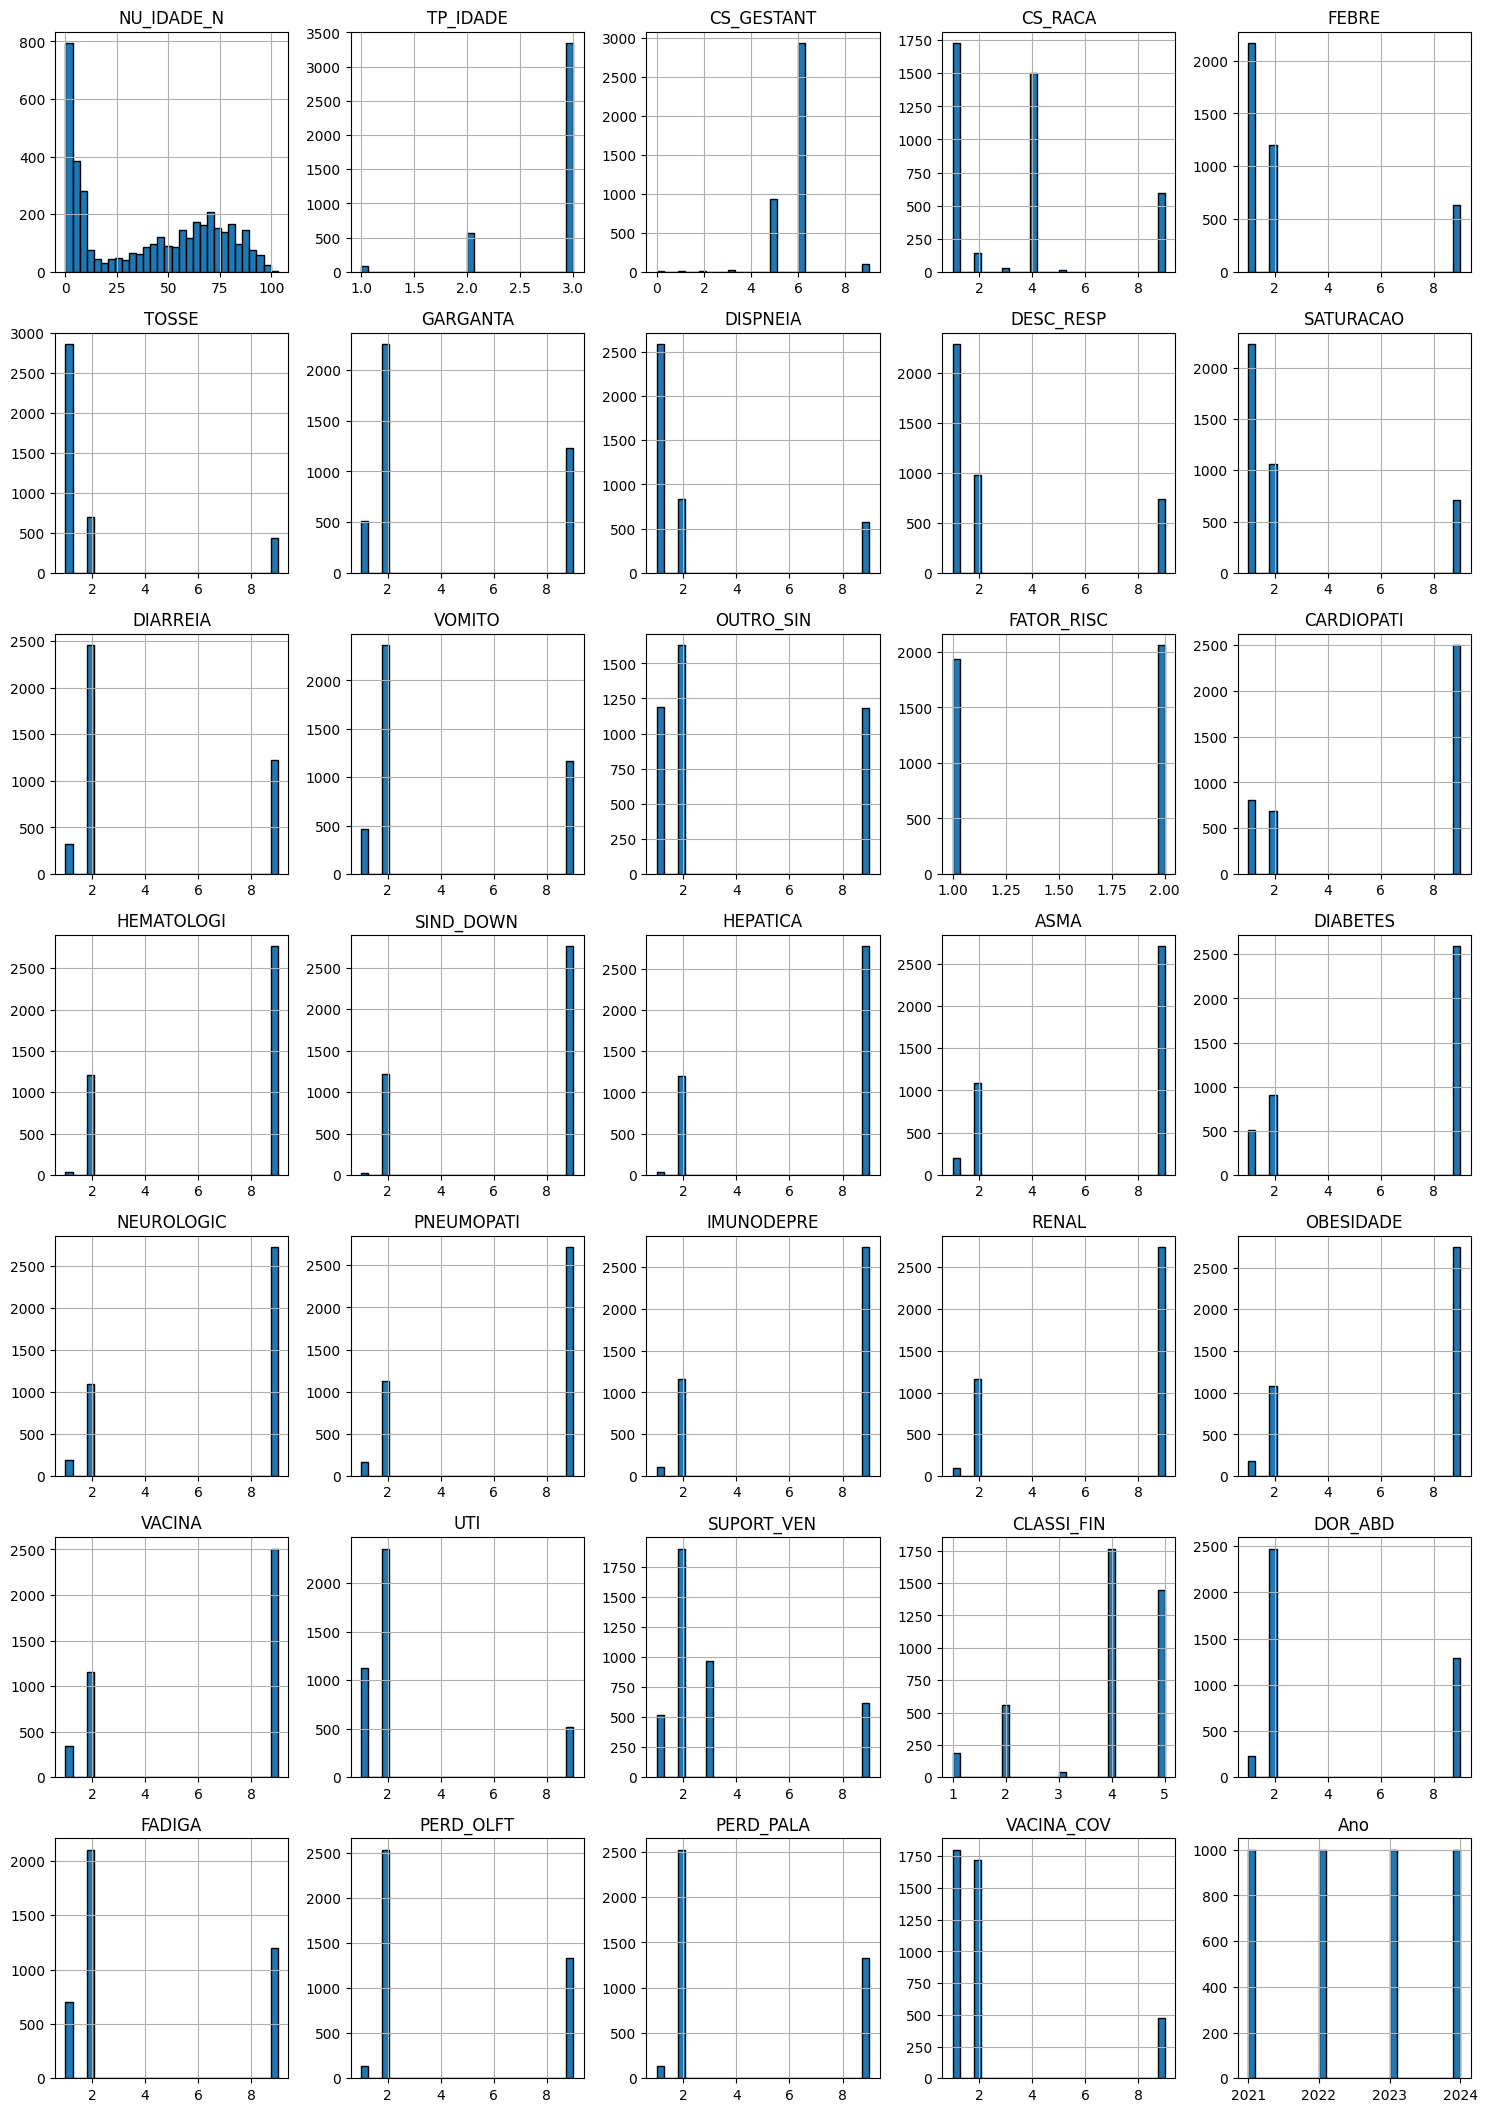

In [34]:
num_cols = 5  # Número de gráficos por linha
num_rows = len(colunas_numericas) // num_cols + 1  # Calcula o número de linhas necessárias

# Plotando os histogramas
SRAG[colunas_numericas].hist(bins=30, figsize=(15, num_rows * 3), layout=(num_rows, num_cols), edgecolor='black')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

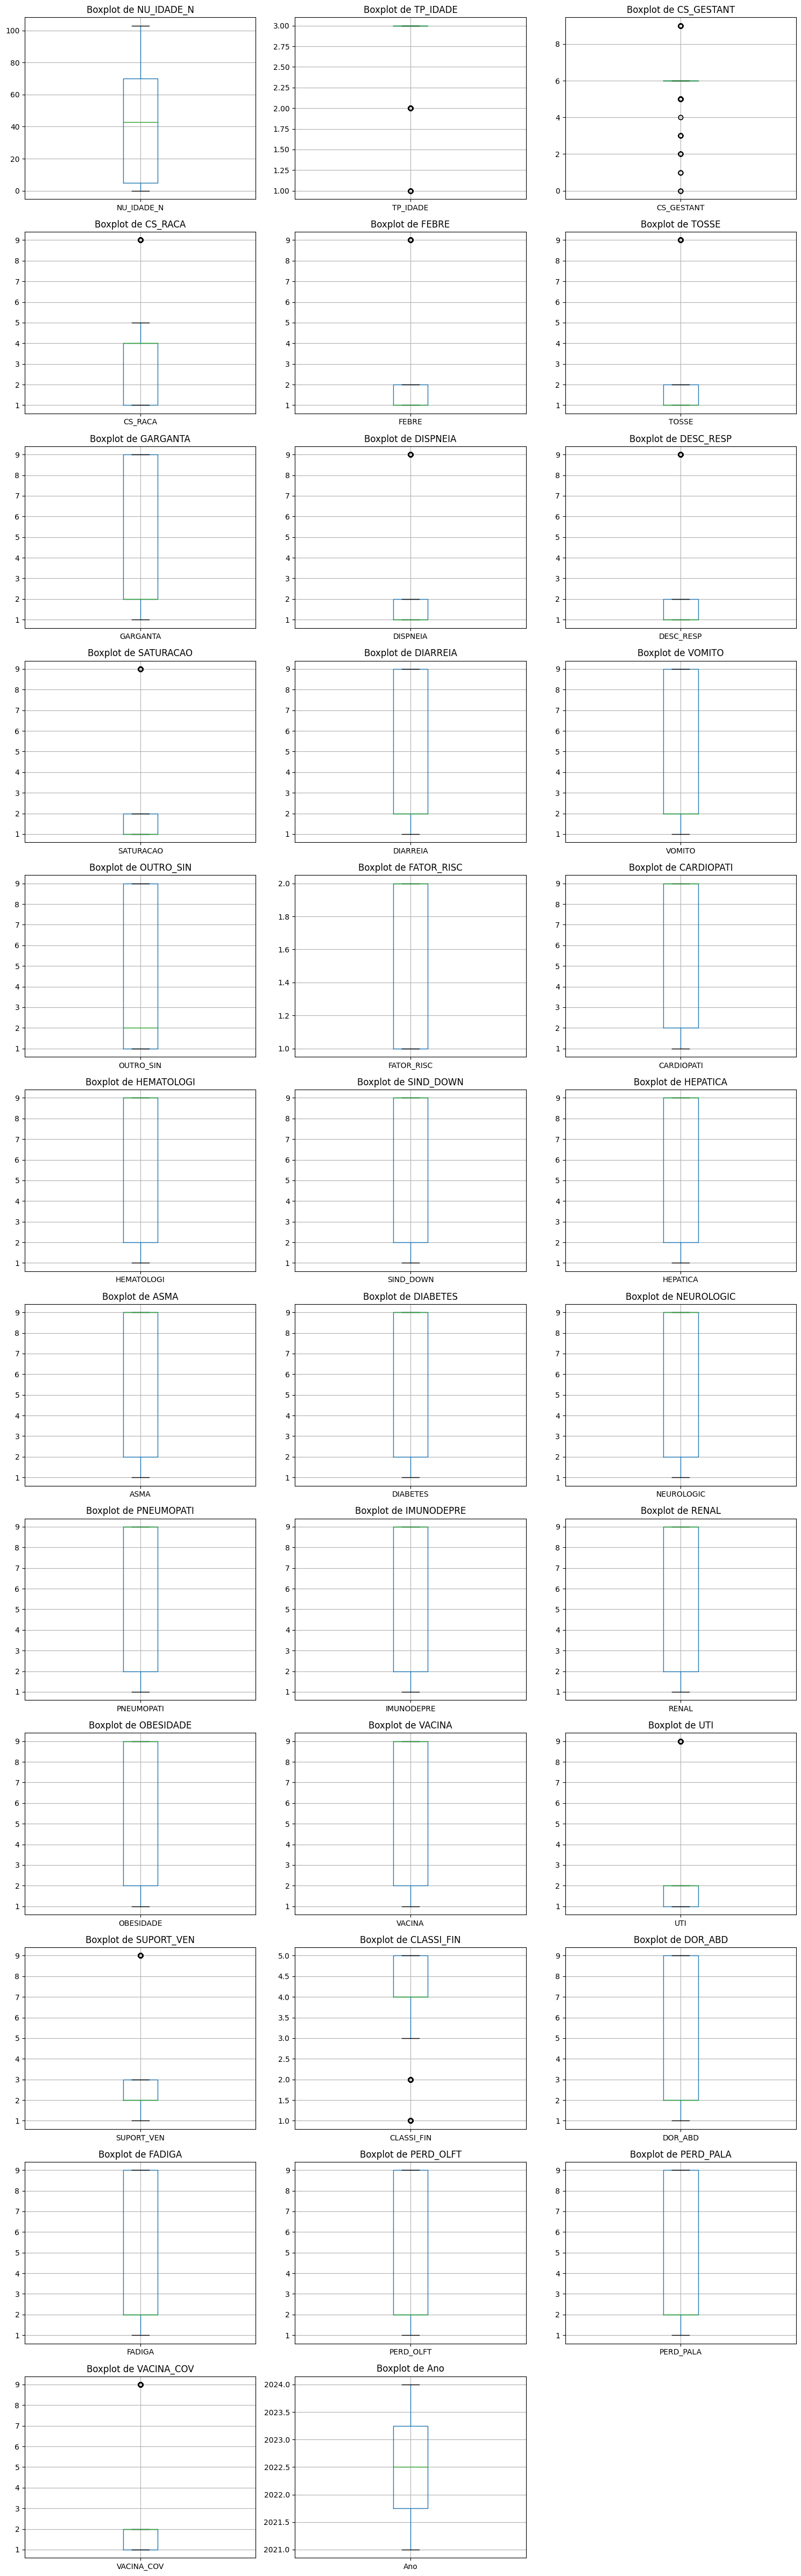

In [35]:
# Definindo o tamanho da figura e o layout
num_colunas = len(colunas_numericas)
num_linhas = (num_colunas // 3) + 1  # Definindo o número de linhas, com 3 colunas por linha

# Criando subplots
fig, axes = plt.subplots(num_linhas, 3, figsize=(15, num_linhas * 4))
axes = axes.flatten()  # Para iterar sobre os eixos com facilidade

# Plotando um boxplot para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    SRAG.boxplot(column=coluna, ax=axes[i])
    axes[i].set_title(f'Boxplot de {coluna}')
    axes[i].set_xlabel('')

# Removendo os eixos que não possuem gráficos (caso sobre espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustando o layout para melhor visualização
plt.tight_layout()
plt.show()


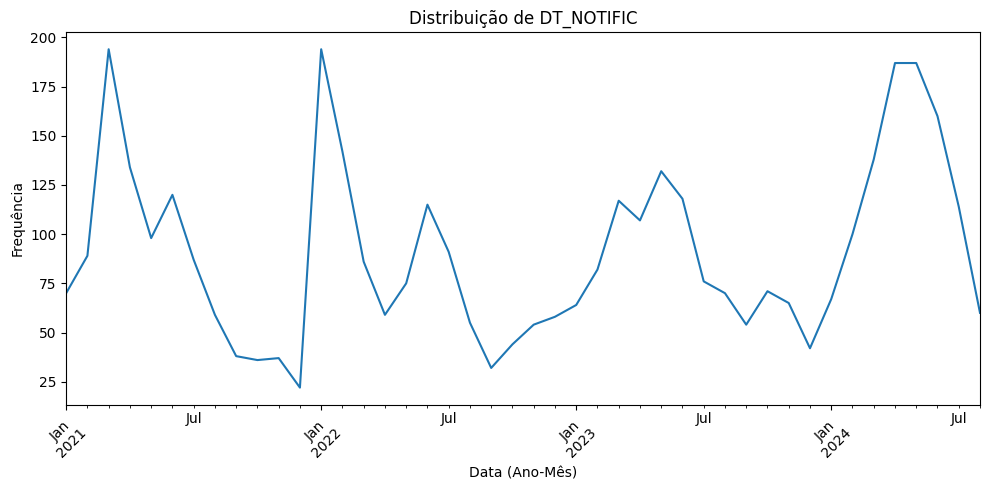

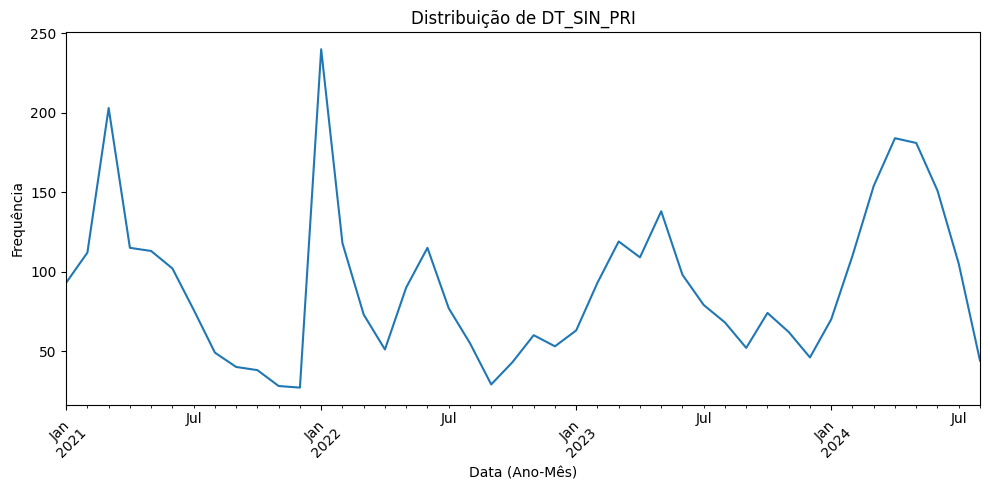

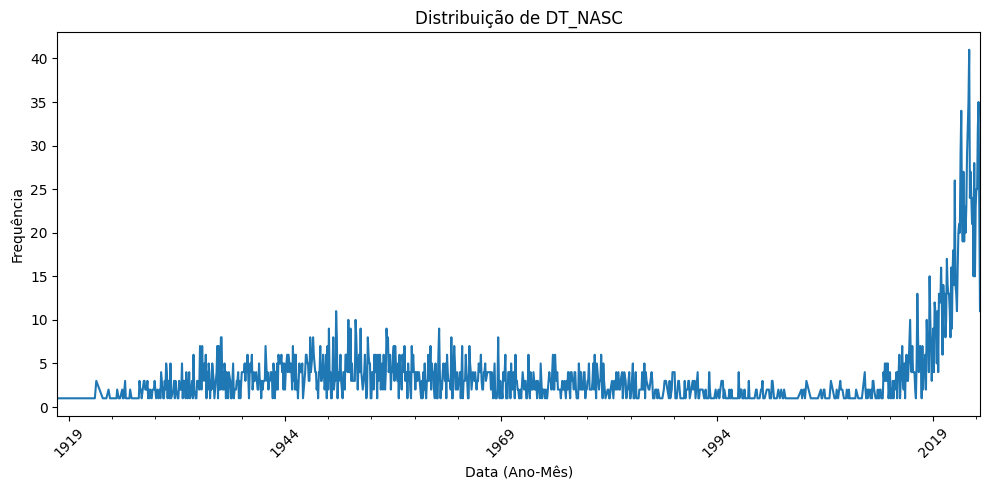

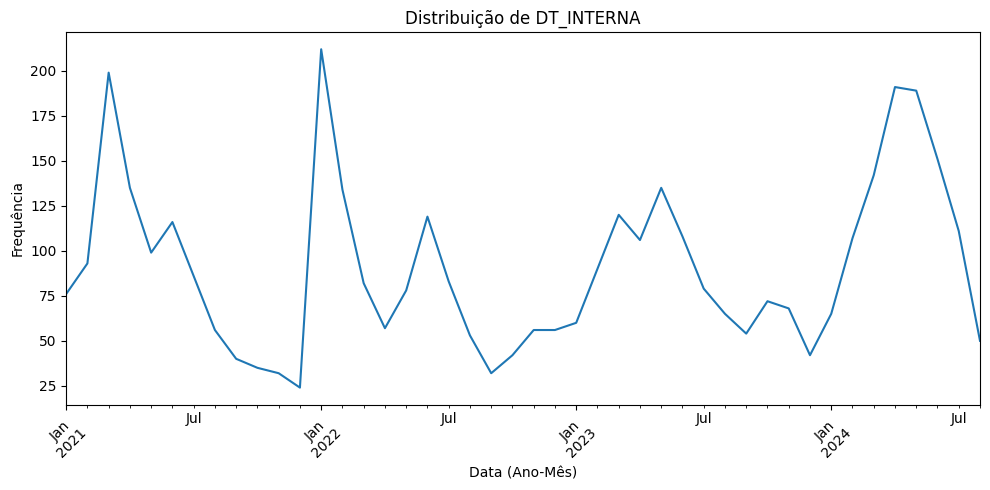

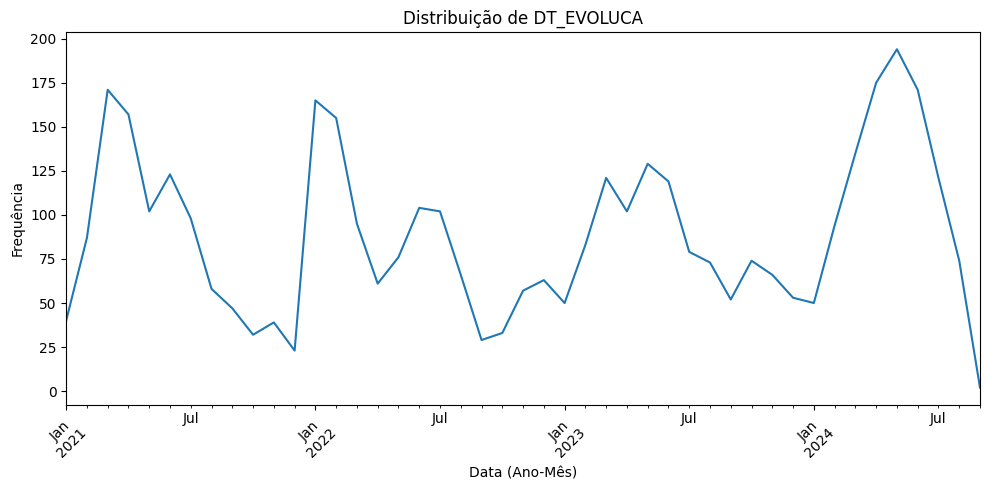

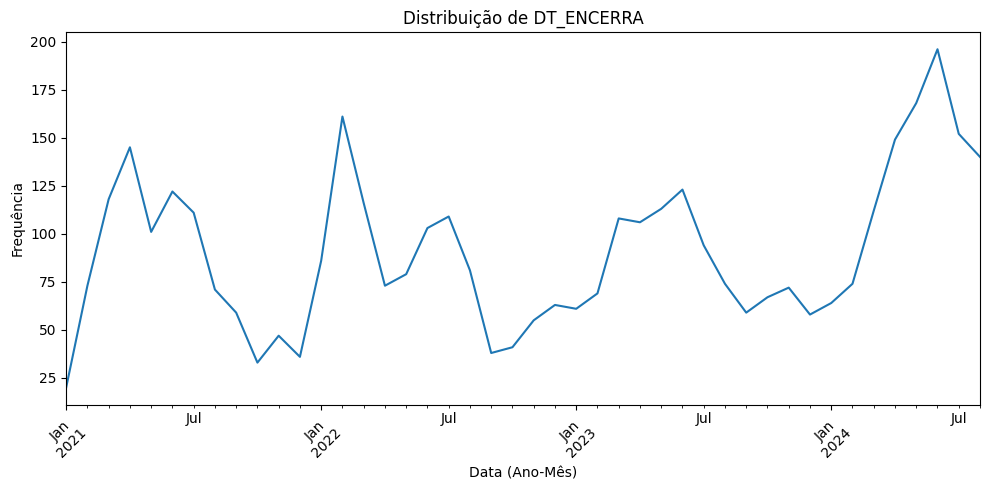

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

date_columns = date_columns  # Ajuste com as suas colunas de datas

# Convertendo para datetime se ainda não estiver no formato correto
SRAG[date_columns] = SRAG[date_columns].apply(pd.to_datetime, errors='coerce')

# Criando um gráfico de linhas para cada coluna de data
for col in date_columns:
    SRAG[col].groupby(SRAG[col].dt.to_period("M")).count().plot(kind='line', figsize=(10, 5), title=f"Distribuição de {col}")
    plt.xlabel('Data (Ano-Mês)')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


####Visualização (Gráficos)

In [37]:
#Definindo estilo padrão para os gráficos
def configurar_grafico(titulo, xlabel, ylabel):
    """Configura o estilo do gráfico e parâmetros básicos."""
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))  # Tamanho padrão do gráfico
    plt.title(titulo, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos do eixo x
    plt.tight_layout()  # Ajuste do layout

def configurar_grafico_rosca_pizza(titulo):
    """Configura o estilo do gráfico para gráficos de rosca e pizza com cores personalizadas."""
    plt.figure(figsize=(8, 8))  # Tamanho do gráfico
    plt.title(titulo, fontsize=16, fontweight='bold', color='#333333')  # Título estilizado
    plt.tight_layout()  # Ajusta o layout
    plt.gca().set_facecolor('#f0f0f0')  # Fundo claro para o gráfico


In [38]:
#Definindo algumas classificações usadas em análises futuras para mais de um gráfico

# Lista das colunas de sintomas
colunas_sintomas = ['DOR_ABD', 'FADIGA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
                    'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN',
                    'PERD_OLFT', 'PERD_PALA']

# Substituir valores numéricos por texto nas colunas de sintomas
SRAG[colunas_sintomas] = SRAG[colunas_sintomas].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Lista das colunas de riscos
colunas_riscos = ['CARDIOPATI', 'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL',	'OBESIDADE']

# Substituir valores numéricos por texto nas colunas de riscos
SRAG[colunas_riscos] = SRAG[colunas_riscos].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Mapeamento dos rótulos de classificação final
classificacao_labels = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19',
    9: 'Ignorado'
}

# Substituir os valores na coluna 'CLASSI_FIN'
SRAG['CLASSI_FIN'] = SRAG['CLASSI_FIN'].replace(classificacao_labels)

# Substituir os valores na coluna 'FATOR_RISC'
SRAG['FATOR_RISC'] = SRAG['FATOR_RISC'].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Substituir os valores na coluna 'EVOLUCAO'
SRAG['EVOLUCAO'] = SRAG['EVOLUCAO'].replace({1: 'Cura', 2: 'Óbito', '1': 'Cura', '2': 'Óbito', 3: 'Óbito Outros', 9: 'Ignorado'})

# Criando df com os casos que indicam fator risco == 'Sim'
df_ft_risc = SRAG[SRAG['FATOR_RISC'] == 'Sim']

# Criando df com os casos que indicam óbito (EVOLUCAO == 'Óbito')
df_obito = SRAG[SRAG['EVOLUCAO'] == 'Óbito']

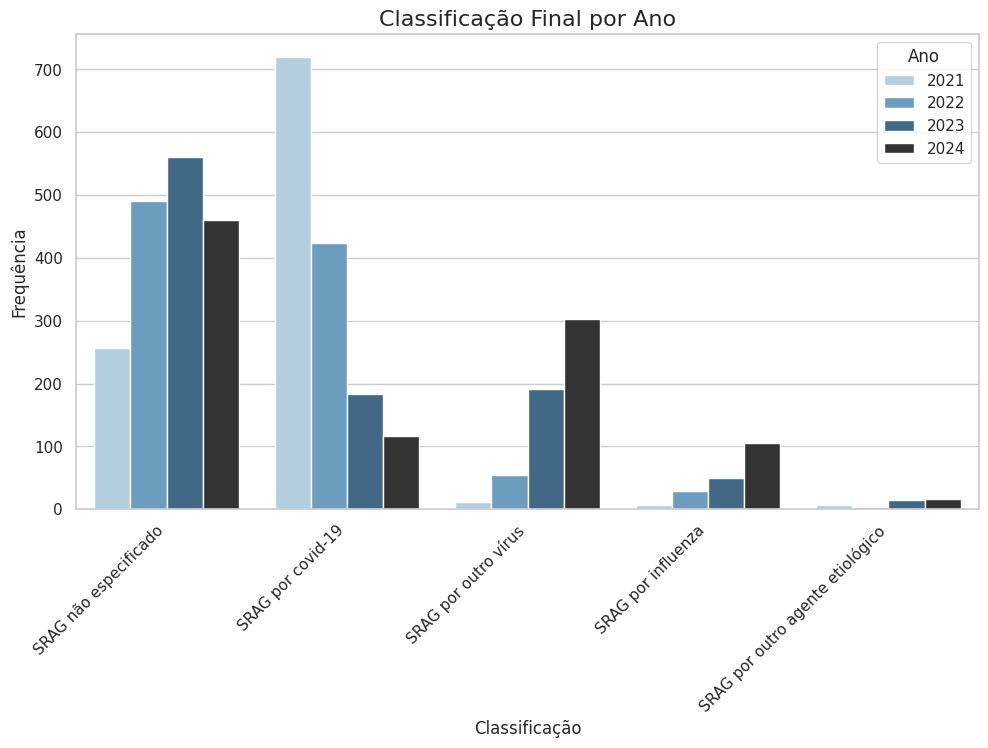

In [39]:
# Configurar gráfico de barras dividido por ano
configurar_grafico('Classificação Final por Ano', 'Classificação', 'Frequência')

# Gráfico de barras com hue para dividir por ano
sns.countplot(data=SRAG, x='CLASSI_FIN', hue='Ano', palette='Blues_d', order=SRAG['CLASSI_FIN'].value_counts().index)

plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.show()

Vemos que **'SRAG não especificado'** é a categoria mais frequente, sugerindo dificuldades no diagnóstico ou classificação imprecisa. Os casos de **'SRAG por COVID-19'** predominaram em 2021, mas caíram nos anos subsequentes, possivelmente devido à vacinação, enquanto **'SRAG por outros vírus'** e **'SRAG por influenza'** cresceu de 2021 a 2024. Embora os casos de COVID-19 tenham diminuído, eles continuam a superar os de influenza em todos os anos. Pontos de atenção incluem a subnotificação de SRAG não especificado, a necessidade de monitorar novos vírus e a importância de campanhas de vacinação contra influenza e COVID-19.

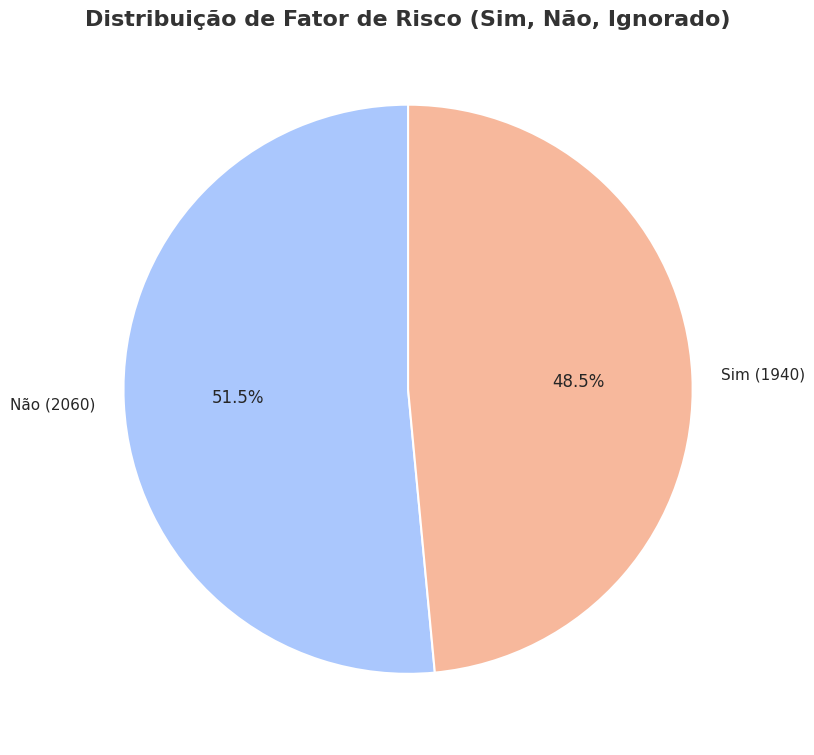

In [40]:
# Substituir os valores 1, 2 e 9 por "Sim", "Não" e "Ignorado"
# Contar os valores únicos na coluna 'FATOR_RISC'
fator_risco_counts = SRAG['FATOR_RISC'].value_counts()

# Criar os rótulos personalizados: categoria, quantidade e porcentagem
labels = [f'{cat} ({count})'
          for cat, count in zip(fator_risco_counts.index, fator_risco_counts.values)]

colors = sns.color_palette("coolwarm", len(labels))  # Paleta de cores personalizada

# Configura o gráfico
configurar_grafico_rosca_pizza("Distribuição de Fator de Risco (Sim, Não, Ignorado)")

# Criar gráfico de pizza
plt.pie(fator_risco_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})  # Fatias com borda branca
plt.show()

A análise dessa distribuição de fator de risco destaca uma divisão equilibrada entre pessoas com fatores de risco e sem, esse dado é significativo, pois indica que a SRAG não afeta apenas populações tradicionalmente vulneráveis com comorbidades, mas também uma parcela de indivíduos sem fatores de risco conhecidos.

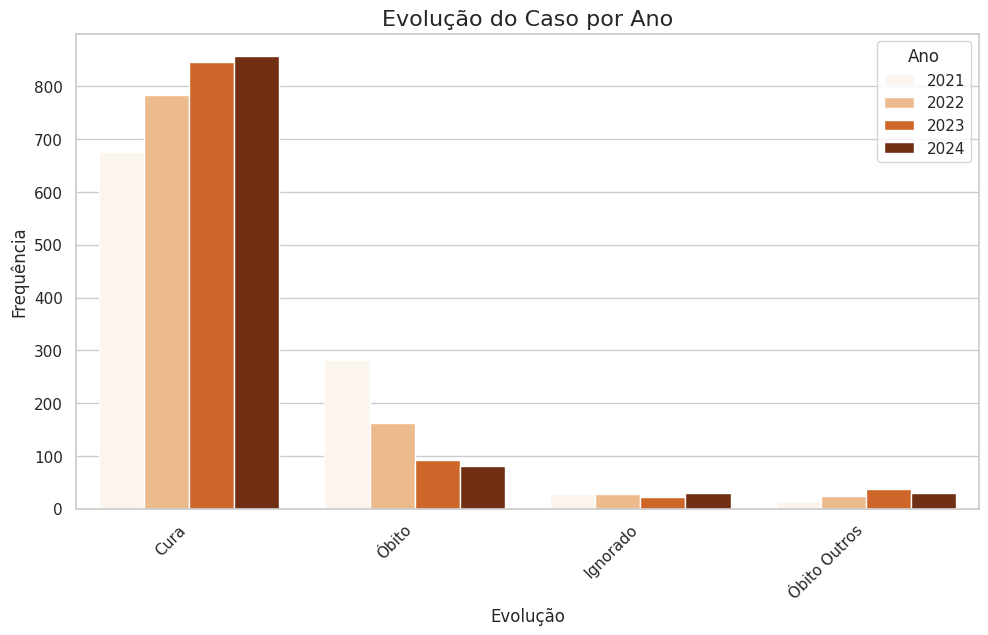

In [41]:
# Criar o gráfico de barras
configurar_grafico('Evolução do Caso por Ano', 'Evolução', 'Frequência')
sns.countplot(data=SRAG, x='EVOLUCAO', hue='Ano', palette='Oranges', order=SRAG['EVOLUCAO'].value_counts().index)

plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.show()

O gráfico mostra a evolução dos casos de SRAG entre 2021 e 2024 revela que as curas superam os óbitos em todos os anos, indicando um tratamento eficaz e melhorias na gestão clínica da doença. O aumento contínuo nas curas ao longo desse período sugere avanços nos tratamentos e intervenções, com 2024 apresentando a maior frequência de curas, enquanto os óbitos diminuem gradualmente, atingindo o menor valor em 2024.

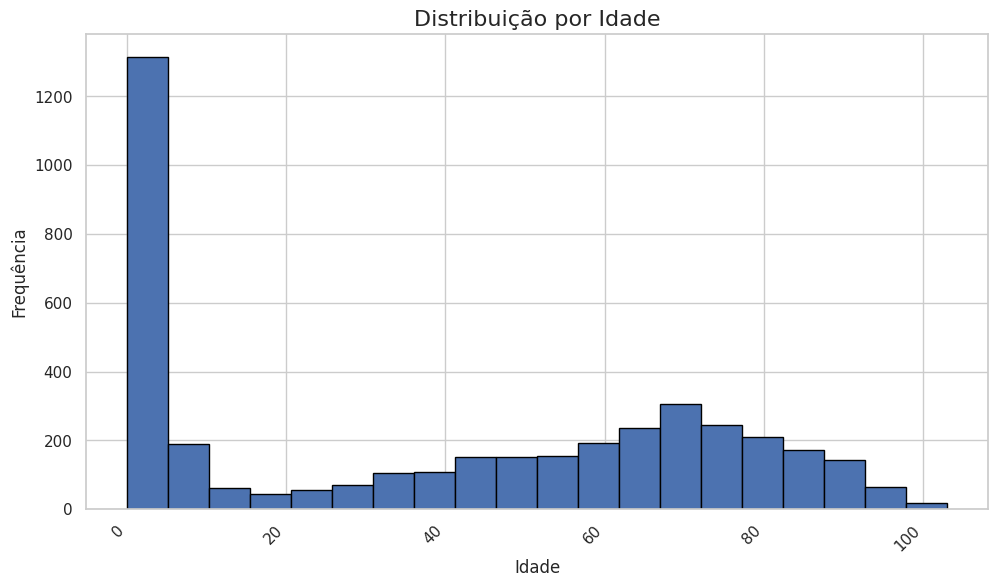

In [42]:
# Criar o gráfico Histograma
configurar_grafico('Distribuição por Idade', 'Idade', 'Frequência')
plt.hist(SRAG['APENAS_ANO'].dropna(), bins=20, edgecolor='black')

plt.show()

O histograma de Distribuição por idade revela uma alta incidência em recém-nascidos, refletindo sua vulnerabilidade imunológica, enquanto a quantidade de casos diminui gradualmente perto dos 20 anos, indicando uma resposta imune mais robusta nessa faixa etária. A partir dos 50 anos, observa-se um aumento significativo de casos, devido à imunossenescência e à presença de comorbidades, tornando os idosos um grupo de risco elevado para complicações de SRAG.

<ipython-input-43-4ca1e39cb9bb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')


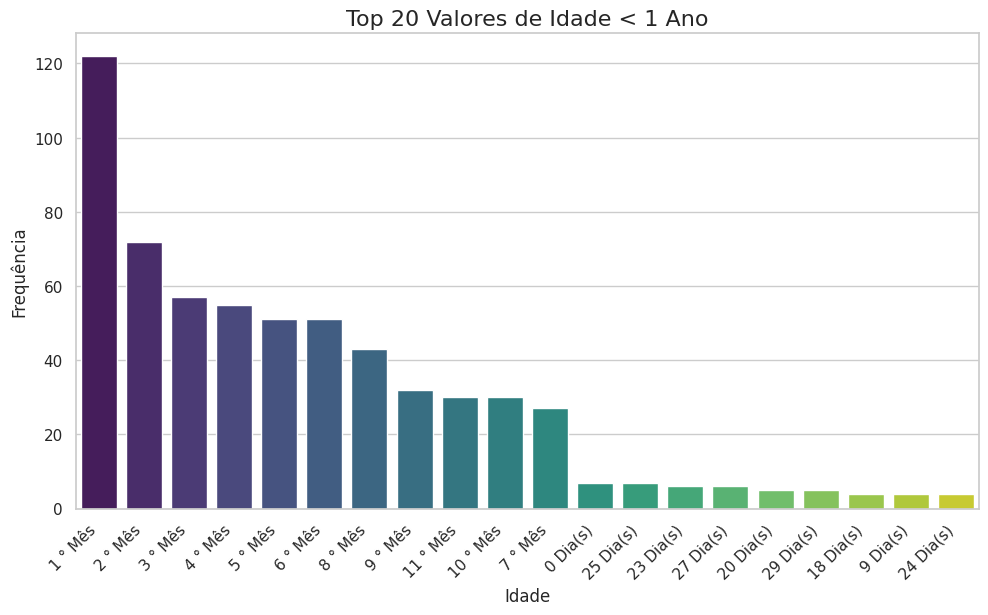

In [43]:
# Vendo no detalhe o tempo de vida das pessoas com 0 de idade
filtered_data = SRAG[SRAG['APENAS_ANO'] == 0]

# Contar a frequência de cada valor em 'NU_IDADE_N_CONCATENADA'
count_data = filtered_data['IDADE_CONCATENADA'].value_counts()

# Obter os 20 valores mais frequentes
top_20 = count_data.head(20)

# Criar o gráfico de barras
configurar_grafico('Top 20 Valores de Idade < 1 Ano', 'Idade', 'Frequência')
sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')
plt.show()

O gráfico indica que a maior quantidade de ocorrências de SRAG está concentrada em bebês com zero a seis meses, destacando uma alta vulnerabilidade nos primeiros meses de vida, especialmente em recém-nascidos e prematuros. A predominância de casos em bebês de zero dias sugere diagnósticos imediatos de complicações respiratórias ou infecções perinatais, exigindo monitoramento rigoroso e cuidados intensivos. A diminuição dos casos à medida que os bebês envelhecem podem indicar um fortalecimento do sistema imunológico.

<ipython-input-44-d5250e1e0bbe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_obitos.index, y=top_25_obitos.values, palette='Blues_d', order=top_25_obitos.index)


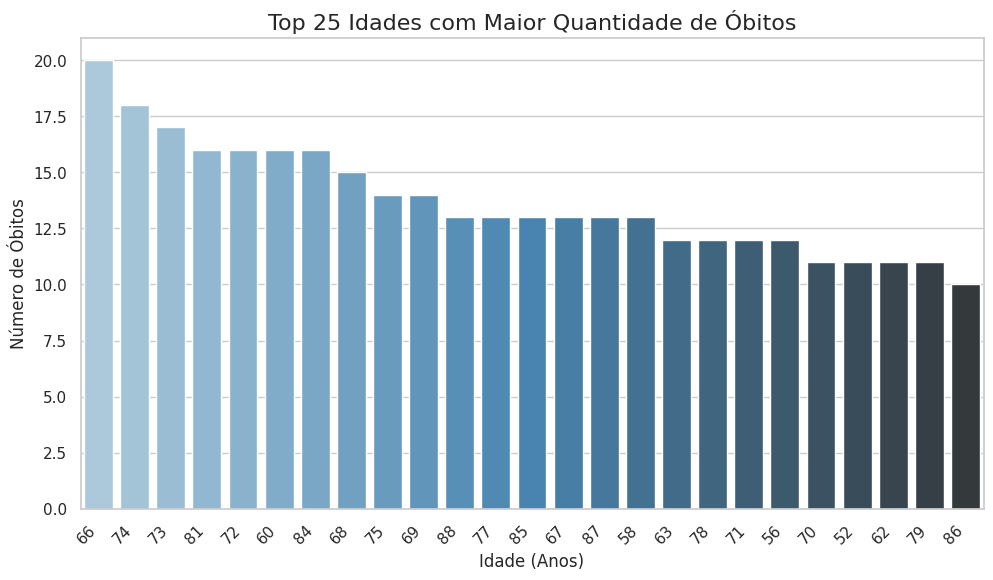

In [44]:
#Idade com maior quantidade de obito
obitos_por_idade = df_obito['APENAS_ANO'].value_counts()

# Selecionando os top 25 idades com maior quantidade de óbitos em ordem decrescente
top_25_obitos = obitos_por_idade.nlargest(25)

# Criando o gráfico de barras para os top 25
configurar_grafico('Top 25 Idades com Maior Quantidade de Óbitos', 'Idade (Anos)', 'Número de Óbitos')
sns.barplot(x=top_25_obitos.index, y=top_25_obitos.values, palette='Blues_d', order=top_25_obitos.index)

plt.show()

O gráfico de barras revela que a maior taxa de mortalidade por SRAG ocorre aos **66 anos**, com uma concentração significativa de óbitos entre as idades de **60 e 80 anos**, refletindo a vulnerabilidade dos indivíduos mais velhos a complicações de saúde. A presença de mortes em idades a partir de **56 anos** destaca a importância de investigar os fatores de risco, como doenças crônicas, que contribuem para essas taxas.

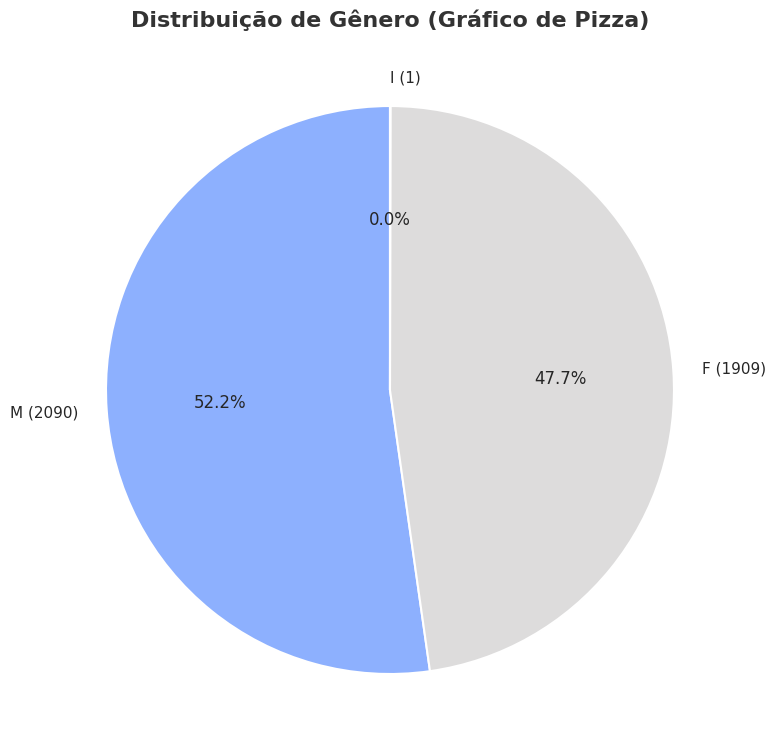

In [45]:
# Contar os valores únicos na coluna 'CS_SEXO'
sexo_counts = SRAG['CS_SEXO'].value_counts()

# Criar os rótulos personalizados: categoria, quantidade e porcentagem
labels = [f'{cat} ({count})'
          for cat, count in zip(sexo_counts.index, sexo_counts.values)]

colors = sns.color_palette("coolwarm", len(labels))  # Paleta de cores personalizada

# Configura o gráfico
configurar_grafico_rosca_pizza("Distribuição de Gênero (Gráfico de Pizza)")

# Criar gráfico de pizza
plt.pie(sexo_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})  # Fatias com borda branca
plt.show()



O gráfico de pizza indica uma distribuição quase equilibrada entre os gêneros masculino e feminino, com uma leve predominância do masculino (52%) em relação ao feminino (47%).

<ipython-input-46-1e1a1a91244b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feminino['CS_GESTANT_LABEL'] = df_feminino['CS_GESTANT'].map(mapeamento_gestant)
<ipython-input-46-1e1a1a91244b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem.index, y=contagem.values, palette='Blues')


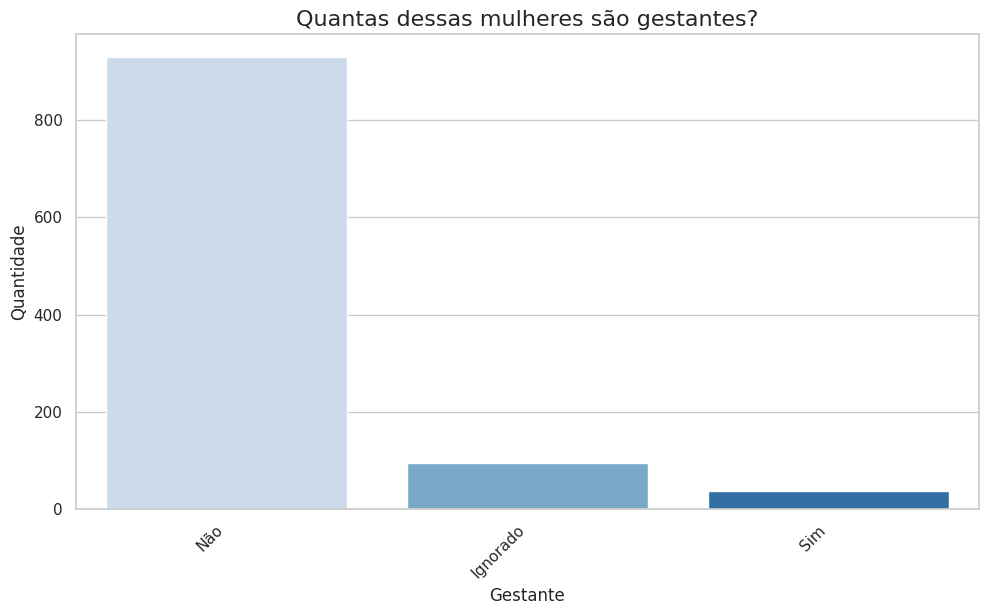

In [46]:
# Filtrar o DataFrame para incluir apenas as linhas onde CS_SEXO é 'F' e revendo valores não se aplica, que se refere a meninas menores de 9 anos -> mehor grafico de rosca
df_feminino = SRAG[(SRAG['CS_SEXO'] == 'F') & (SRAG['CS_GESTANT'] != 6)]

# Criar um dicionário para mapear os valores de CS_GESTANT
mapeamento_gestant = {
    1: 'Sim',
    2: 'Sim',
    3: 'Sim',
    4: 'Sim',
    5: 'Não',
    9: 'Ignorado'
}

# Substituir os valores de CS_GESTANT usando o mapeamento
df_feminino['CS_GESTANT_LABEL'] = df_feminino['CS_GESTANT'].map(mapeamento_gestant)

# Exibir os valores únicos de CS_GESTANT_LABEL para o sexo feminino
contagem = df_feminino['CS_GESTANT_LABEL'].value_counts()

# Criar um gráfico de barras

configurar_grafico("Quantas dessas mulheres são gestantes?", "Gestante", "Quantidade")
sns.barplot(x=contagem.index, y=contagem.values, palette='Blues')
plt.show()

O gráfico indica que a grande maioria das mulheres analisadas não se encontra em estado de gestação, refletindo uma proporção significativamente maior de não gestantes em comparação com aquelas que estão grávidas.

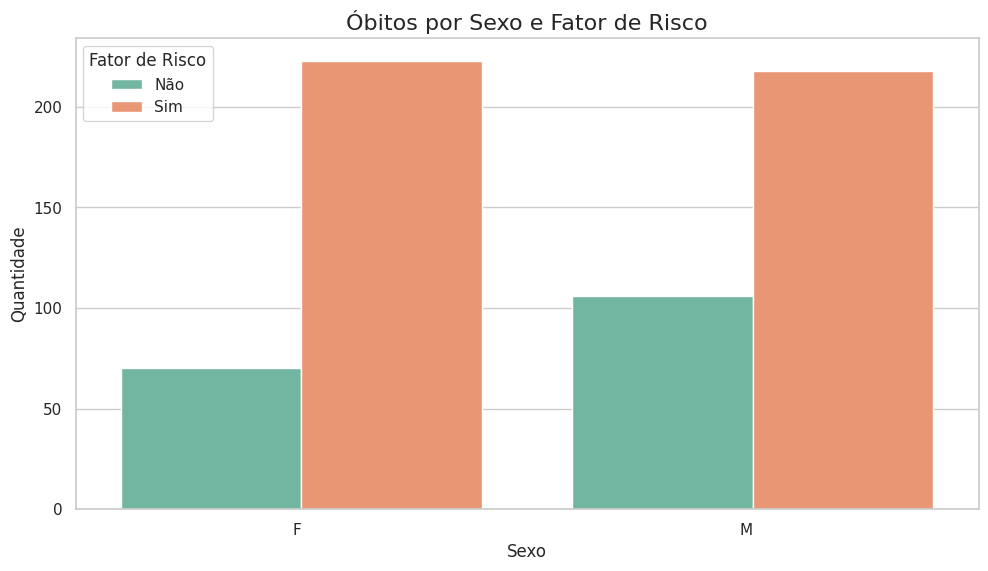

In [47]:
# Filtrando os óbitos e contando por sexo
obitos_por_sexo = df_obito['CS_SEXO'].value_counts()

# Contando os óbitos com fator de risco "Sim" e "Não"
obitos_fator_risco = df_obito[df_obito['FATOR_RISC'].isin(['Sim', 'Não'])].groupby(['CS_SEXO', 'FATOR_RISC']).size().unstack(fill_value=0)

# Criando um DataFrame para facilitar a visualização
data = obitos_fator_risco.reset_index()

# Derretendo o DataFrame para o seaborn
data_melted = data.melt(id_vars='CS_SEXO', var_name='Fator de Risco', value_name='Quantidade')

# Configurando o gráfico
configurar_grafico("Óbitos por Sexo e Fator de Risco", "Sexo", "Quantidade")

# Criando o gráfico de barras
sns.barplot(data=data_melted, x='CS_SEXO', y='Quantidade', hue='Fator de Risco', palette='Set2')

plt.legend(title='Fator de Risco')
plt.xticks(rotation=0)
plt.show()

O gráfico de barras revela que a mortalidade entre homens e mulheres é semelhante quando se considera a presença de fatores de risco, indicando um padrão de vulnerabilidade semelhante entre os gêneros nessa situação. No entanto, ao analisarmos os óbitos sem fatores de risco, observa-se que os homens têm uma taxa ligeiramente maior de mortalidade em comparação com as mulheres. Essa diferença sugere que, na ausência de fatores de risco conhecidos, os homens podem estar mais expostos a condições de saúde adversas ou a outras circunstâncias que contribuem para um aumento nas taxas de óbito.

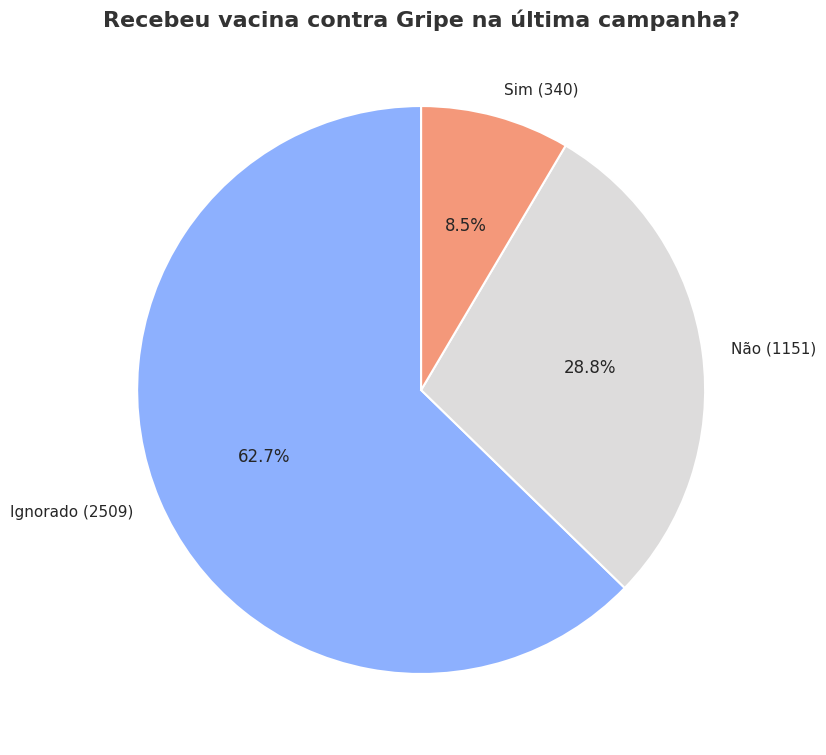

In [48]:
# Plotar gráfico de barras para uma coluna categórica
SRAG['VACINA'] = SRAG['VACINA'].replace({
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado'
})

# Contar os valores de VACINA
contagem_vacina = SRAG['VACINA'].value_counts()

# Criar rótulos personalizados
labels = [f'{cat} ({count})'
          for cat, count in zip(contagem_vacina.index, contagem_vacina.values)]
colors = sns.color_palette("coolwarm", len(labels))  # Paleta de cores personalizada

# Configura o gráfico
configurar_grafico_rosca_pizza("Recebeu vacina contra Gripe na última campanha?")

# Criar gráfico de pizza
plt.pie(contagem_vacina, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})  # Fatias com borda branca
plt.show()

Essa alta taxa de respostas ignoradas pode sugerir falta de acesso à informação, desinteresse ou resistência em relação à vacinação, o que é preocupante em termos de saúde pública. A baixa taxa de vacinação, somada ao elevado número de respostas não registradas, indica a necessidade urgente de campanhas informativas e estratégias para aumentar a adesão à vacinação, visando proteger a saúde da população e reduzir o risco de surtos gripais.

<ipython-input-49-74ca44b5a9d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_influenza['Evolucao_Status'] = filtro_influenza['EVOLUCAO'].apply(lambda x: 'Óbito' if x in ['Óbito', 'Óbito por outras causas'] else 'Cura')


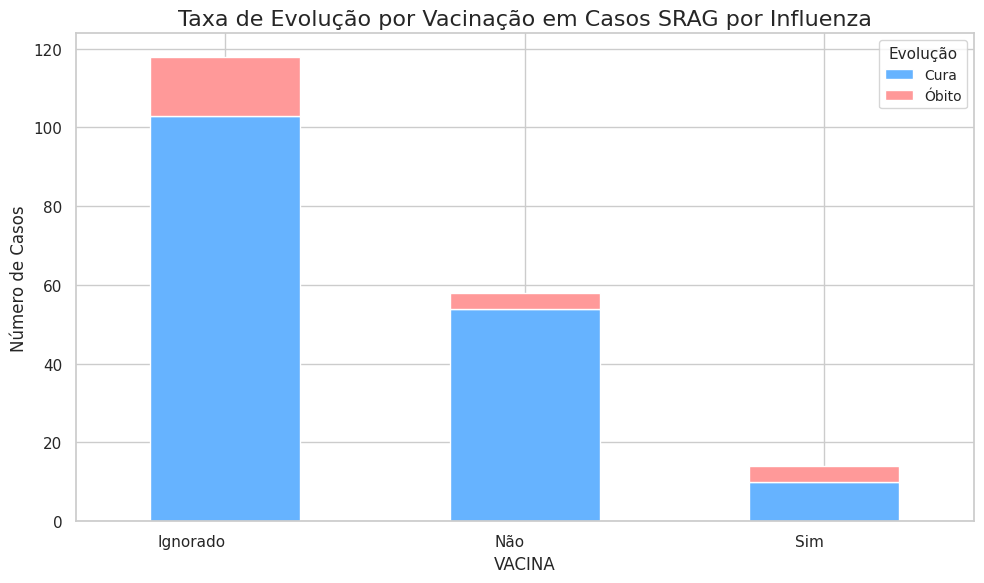

In [49]:
# Dos casos em que esteve positivo a CLASSI_FIN por influenza, a vacinação reduziu a taxa de mortalidade?
# Filtrando os dados para SRAG por influenza
filtro_influenza = SRAG[SRAG['CLASSI_FIN'] == 'SRAG por influenza']

# Criando uma nova coluna para identificar se houve óbito
filtro_influenza['Evolucao_Status'] = filtro_influenza['EVOLUCAO'].apply(lambda x: 'Óbito' if x in ['Óbito', 'Óbito por outras causas'] else 'Cura')

# Agrupando os dados por vacinação e evolução
dados_agrupados = filtro_influenza.groupby(['VACINA', 'Evolucao_Status']).size().unstack(fill_value=0)

# Configurando o gráfico
configurar_grafico('Taxa de Evolução por Vacinação em Casos SRAG por Influenza', 'Vacinação', 'Número de Casos')

# Criando o gráfico de barras
dados_agrupados.plot(kind='bar', stacked=True, color=['#66B3FF','#FF9999'], ax=plt.gca())

# Ajustando a legenda
plt.legend(title='Evolução', fontsize=10, title_fontsize='11')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Observa-se que a maior parte dos casos que ignoraram a vacina obteve a maior taxa de cura, embora também tenha a maior taxa de óbito, sugerindo que, mesmo entre os não vacinados, a maioria conseguiu superar a doença. Essa situação ressalta a importância da vacinação como uma medida preventiva eficaz, embora o impacto do estado vacinal nos desfechos de saúde não seja linear, indicando a necessidade de mais investigações sobre os fatores que influenciam a evolução dos casos.

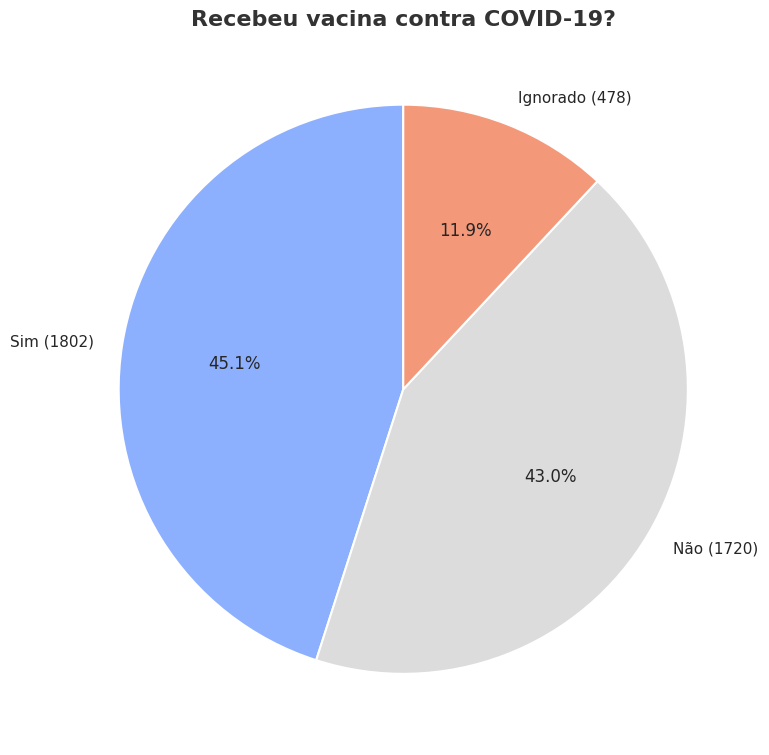

In [50]:
# Gráfico de pizza
SRAG['VACINA_COV'] = SRAG['VACINA_COV'].replace({
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado'
})
# Contar os valores de VACINA_cov
contagem_vacina_cov = SRAG['VACINA_COV'].value_counts()

# Criar rótulos personalizados
labels = [f'{cat} ({count})'
          for cat, count in zip(contagem_vacina_cov.index, contagem_vacina_cov.values)]
colors = sns.color_palette("coolwarm", len(labels))  # Paleta de cores personalizada

# Configura o gráfico
configurar_grafico_rosca_pizza("Recebeu vacina contra COVID-19?")

# Criar gráfico de pizza
plt.pie(contagem_vacina_cov, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})  # Fatias com borda branca
plt.show()

A análise do gráfico de pizza que representa a porcentagem de pessoas vacinadas contra a COVID-19 revela uma situação preocupante em relação à aceitação da vacina. Com 45.1% dos respondentes afirmando que tomaram a vacina, a maioria ainda está vacinada, mas uma proporção significativa de 43% declarou que não recebeu a vacina, o que indica uma resistência considerável. Além disso, 11.9% dos participantes ignoraram a questão, o que pode refletir falta de informação ou desinteresse sobre a vacinação.

<ipython-input-51-de8ac0446fba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_covid['Evolucao_Status'] = filtro_covid['EVOLUCAO'].apply(lambda x: 'Óbito' if x in ['Óbito', 'Óbito por outras causas'] else 'Cura')


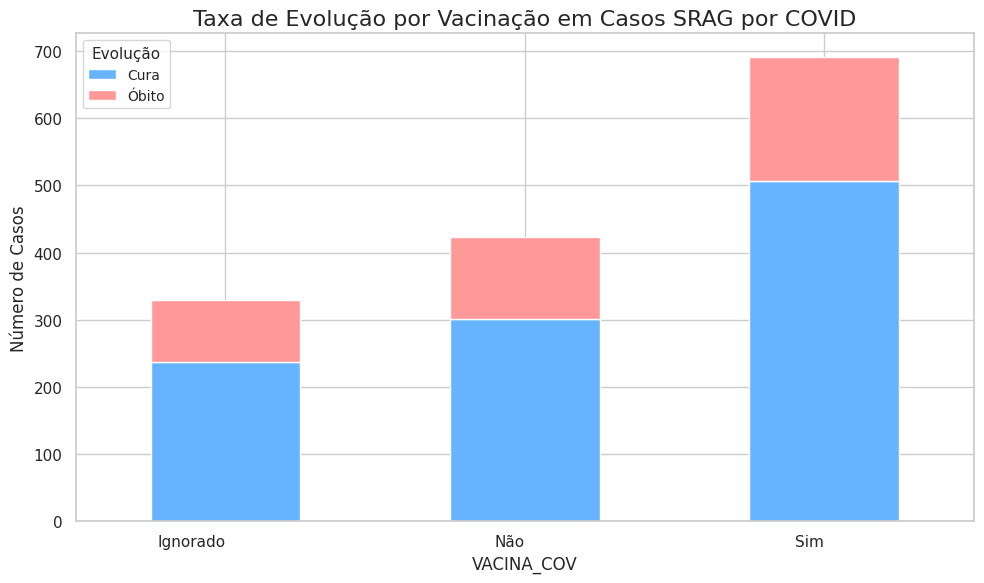

In [51]:
#Dos casos em que esteve positivo a classi_fin por covid, a vacinação reduziu a taxa de mortalidade?
filtro_covid = SRAG[SRAG['CLASSI_FIN'] == 'SRAG por covid-19']

# Criando uma nova coluna para identificar se houve óbito
filtro_covid['Evolucao_Status'] = filtro_covid['EVOLUCAO'].apply(lambda x: 'Óbito' if x in ['Óbito', 'Óbito por outras causas'] else 'Cura')

# Agrupando os dados por vacinação e evolução
dados_agrupados = filtro_covid.groupby(['VACINA_COV', 'Evolucao_Status']).size().unstack(fill_value=0)

# Criando o gráfico de barras
configurar_grafico('Taxa de Evolução por Vacinação em Casos SRAG por COVID',
                    'Vacinação',
                    'Número de Casos')

# Criar o gráfico de barras empilhadas
dados_agrupados.plot(kind='bar', stacked=True, color=['#66B3FF', '#FF9999'], ax=plt.gca())

# Configurando a legenda
plt.legend(title='Evolução', fontsize=10, title_fontsize='11')

# Ajustar layout
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


Observa-se que a coluna referente a pessoas que ignoraram a vacinação apresenta os menores valores, mas ainda assim a maioria dos casos resultou em cura, indicando uma possível recuperação, mesmo na ausência da vacina. Em contrapartida, na categoria de não vacinados, a taxa de cura é relativamente alta, mas com um número considerável de óbitos. Por outro lado, a coluna de vacinados possui a maior taxa de cura entre todas as categorias, além de uma porcentagem de óbitos, sugerindo que a vacinação está associada a melhores desfechos clínicos.

<ipython-input-52-db9927728faf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_covid['Evolucao_Status'] = filtro_covid['EVOLUCAO'].apply(lambda x: 'Óbito' if x in ['Óbito', 'Óbito por outras causas'] else 'Cura')


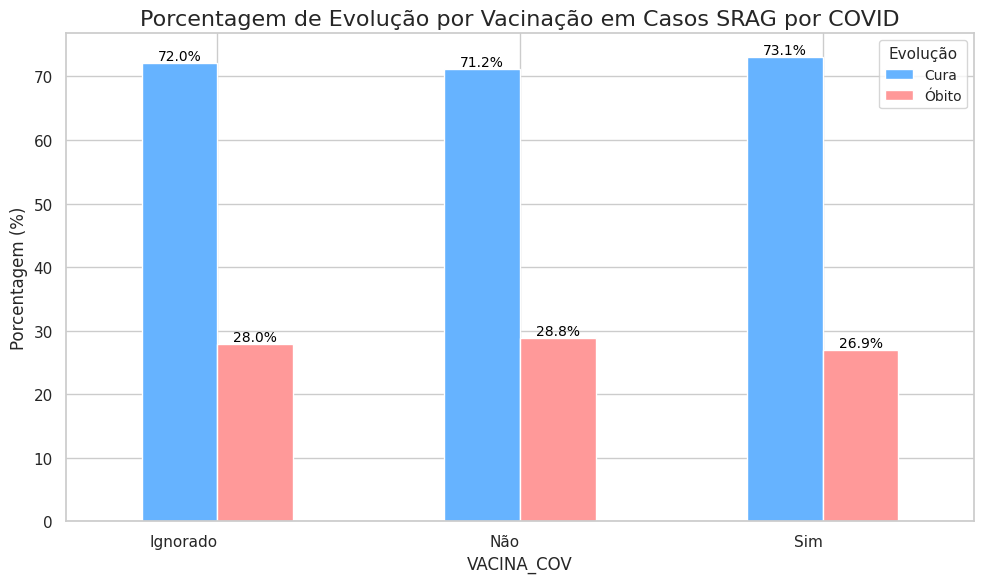

In [52]:
# Filtrando os dados para SRAG por COVID
filtro_covid = SRAG[SRAG['CLASSI_FIN'] == 'SRAG por covid-19']

# Criando uma nova coluna para identificar se houve óbito
filtro_covid['Evolucao_Status'] = filtro_covid['EVOLUCAO'].apply(lambda x: 'Óbito' if x in ['Óbito', 'Óbito por outras causas'] else 'Cura')

# Agrupando os dados por vacinação e evolução
dados_agrupados = filtro_covid.groupby(['VACINA_COV', 'Evolucao_Status']).size().unstack(fill_value=0)

# Calculando a porcentagem
porcentagem = dados_agrupados.div(dados_agrupados.sum(axis=1), axis=0) * 100

# Criando o gráfico de barras lado a lado
configurar_grafico('Porcentagem de Evolução por Vacinação em Casos SRAG por COVID',
                    'Vacinação',
                    'Porcentagem (%)')

# Plotando as barras
porcentagem.plot(kind='bar', ax=plt.gca(), color=['#66B3FF', '#FF9999'])

# Configurando a legenda
plt.legend(title='Evolução', fontsize=10, title_fontsize='11')

# Adicionando os valores acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

# Ajustar layout
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


A análise do gráfico de evolução por vacinação para **esses** casos de SRAG por COVID revela que, independentemente do status vacinal, a taxa de cura é significativamente alta, variando entre 71,2% e 73% para as categorias de vacinação "não" e "sim", respectivamente. Notavelmente, a categoria "ignorado" apresenta uma taxa de cura de 72%, indicando que a vacinação, embora importante, não parece ser o único fator determinante na recuperação dos pacientes. Além disso, a taxa de óbito é relativamente consistente entre as três categorias, variando entre 26,9% e 28,8%, o que sugere que, mesmo entre aqueles que não foram vacinados ou cujos dados de vacinação foram ignorados, a mortalidade não aumenta drasticamente.

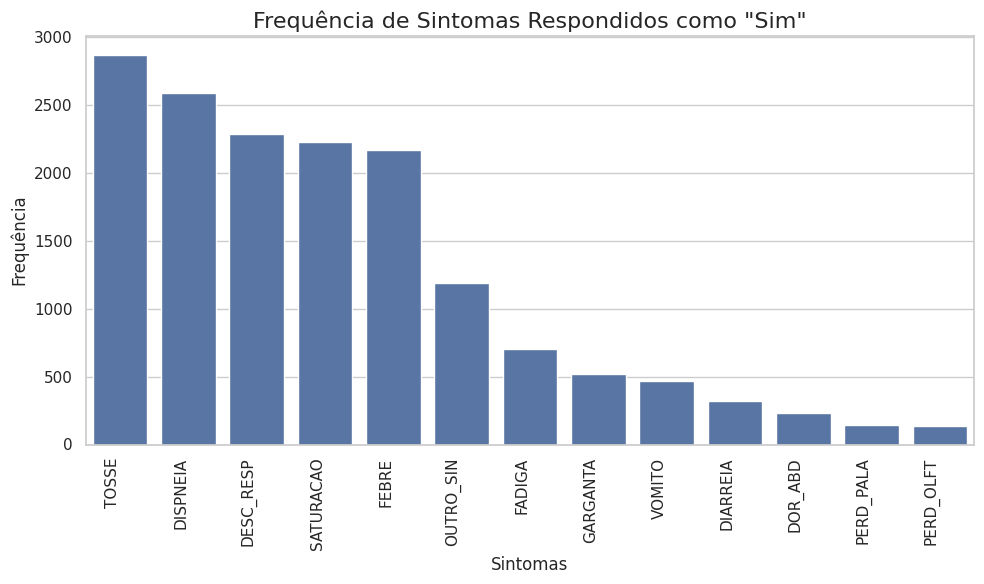

In [53]:
# Contar quantas vezes cada sintoma aparece como "Sim"
frequencia_sintomas = (SRAG[colunas_sintomas] == 'Sim').sum()

# Ordenar por frequência
frequencia_sintomas = frequencia_sintomas.sort_values(ascending=False)

# Configurando o gráfico
configurar_grafico('Frequência de Sintomas Respondidos como "Sim"',
                    'Sintomas',
                    'Frequência')

# Plotar o gráfico de barras
sns.barplot(x=frequencia_sintomas.index, y=frequencia_sintomas.values)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

A análise do gráfico de frequência de sintomas revela uma hierarquia na apresentação dos sintomas relatados pelos pacientes, destacando a tosse como o sintoma mais comum. Seguindo a tosse, a dispneia e a dificuldade respiratória também se destacam, sugerindo que esses sintomas são particularmente prevalentes em casos de SRAG, possivelmente associados a infecções respiratórias como COVID-19.

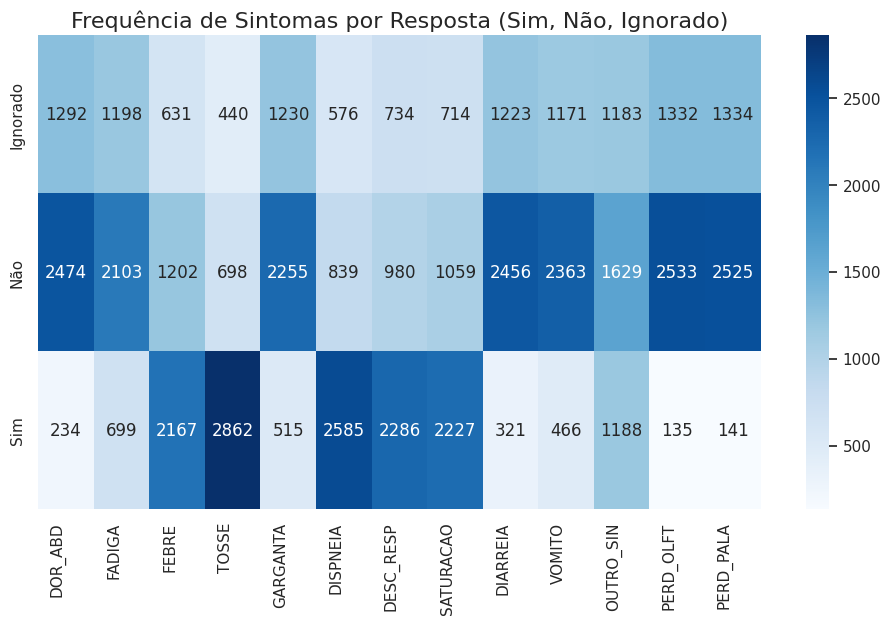

In [54]:
# Contar as ocorrências de "Sim", "Não" e "Ignorado" para cada sintoma
frequencia_sintomas_detalhado = SRAG[colunas_sintomas].apply(pd.Series.value_counts)

# Criar o heatmap com as frequências
configurar_grafico('Frequência de Sintomas por Resposta (Sim, Não, Ignorado)',
                    'Respostas',
                    'Sintomas')

# Criando o heatmap
sns.heatmap(frequencia_sintomas_detalhado, annot=True, cmap="Blues", cbar=True, fmt='d')

plt.show()

A análise do heatmap revela uma clara predominância dos sintomas respiratórios, como tosse, dispneia, saturação e dificuldade respiratória, entre as respostas "sim", indicando que esses sintomas são frequentemente associados aos casos de SRAG. As cores escuras e os valores elevados para esses sintomas sugerem que são os mais relevantes na população analisada. Em contraste, a coluna "não" apresenta a maioria dos sintomas menos comuns, como perda de paladar, dor de garganta, fadiga e diarreia, que não aparecem com a mesma frequência nos casos registrados. Essa discrepância sugere que os sintomas respiratórios são mais críticos para a identificação de casos de SRAG, enquanto os sintomas gastrointestinais e outros podem ser menos indicativos de complicações graves.

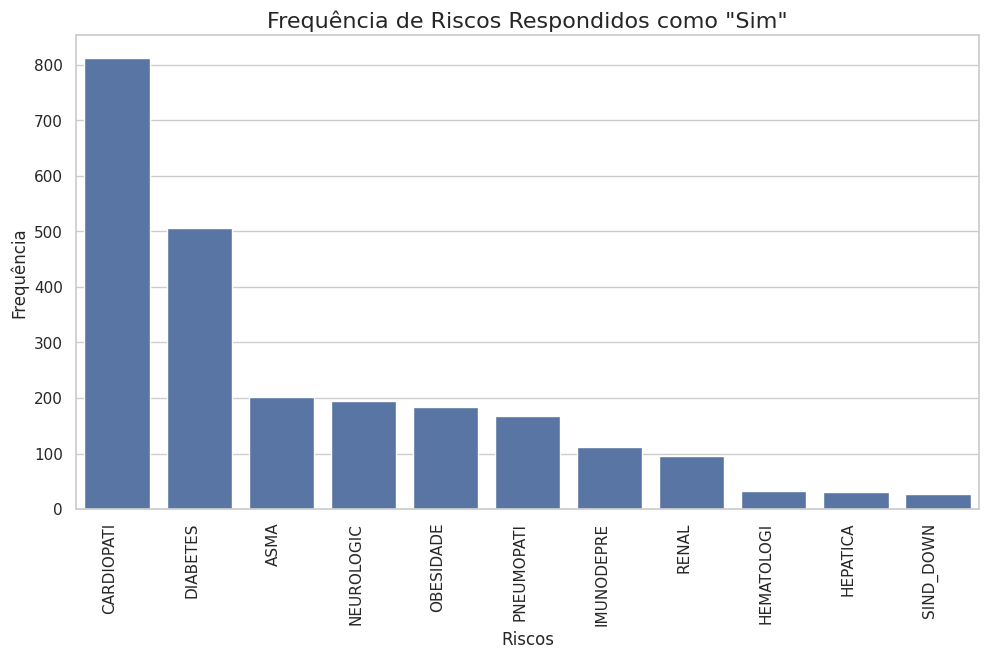

In [55]:
# Contar quantas vezes cada sintoma aparece como "Sim"
frequencia_riscos = (SRAG[colunas_riscos] == 'Sim').sum()

# Ordenar por frequência
frequencia_riscos = frequencia_riscos.sort_values(ascending=False)

# Configurando o gráfico
configurar_grafico('Frequência de Riscos Respondidos como "Sim"',
                    'Riscos',
                    'Frequência')

# Plotar o gráfico de barras
sns.barplot(x=frequencia_riscos.index, y=frequencia_riscos.values)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x

plt.show()


A análise do gráfico revela que a cardiopatia é o fator de risco mais frequentemente reportado pelos pacientes, seguido pelo diabetes e asma, o que indica uma alta prevalência dessas condições entre a população analisada. A presença significativa de fatores de risco como obesidade e doenças neurológicas também sugere que esses grupos estão potencialmente mais vulneráveis a complicações relacionadas a SRAG.

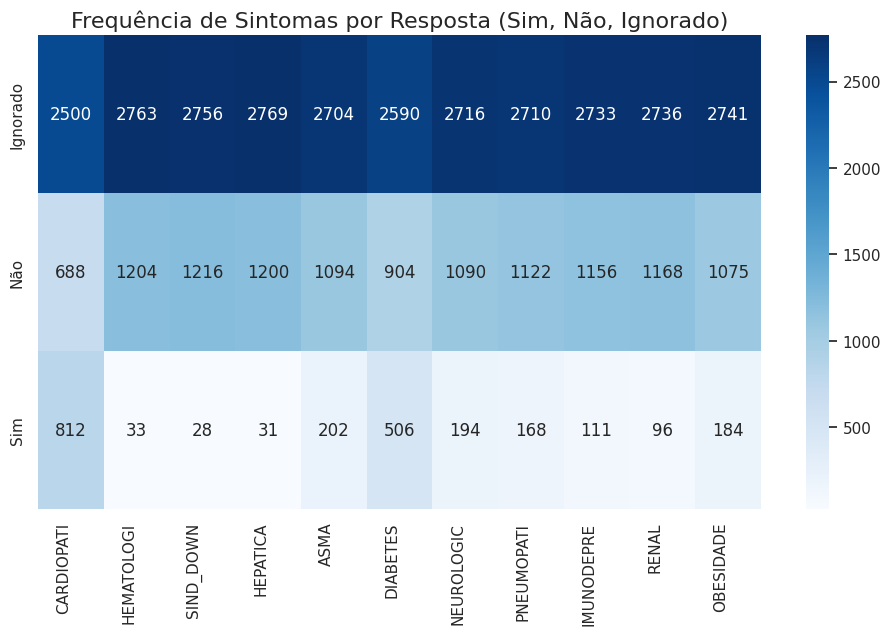

In [56]:
# Contar as ocorrências de "Sim", "Não" e "Ignorado" para cada risco
frequencia_riscos_detalhado = SRAG[colunas_riscos].apply(pd.Series.value_counts)

# Criar o heatmap com as frequências
configurar_grafico('Frequência de Sintomas por Resposta (Sim, Não, Ignorado)',
                    'Respostas',
                    'Sintomas')

# Criando o heatmap
sns.heatmap(frequencia_riscos_detalhado, annot=True, cmap="Blues", cbar=True, fmt='d')

# Exibindo o gráfico
plt.show()

A análise do heat map revela que a maioria das respostas sobre fatores de risco está concentrada nas categorias "ignoradas" e "não". Os riscos como hematológicos e hepatológicos aparecem mais frequentemente nas respostas "não", enquanto a prevalência de "sim" é significativamente menor, com destaque para cardiopatia e diabetes.

<ipython-input-57-a57f4b601709>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_obito, x='FATOR_RISC', palette='Pastel1')


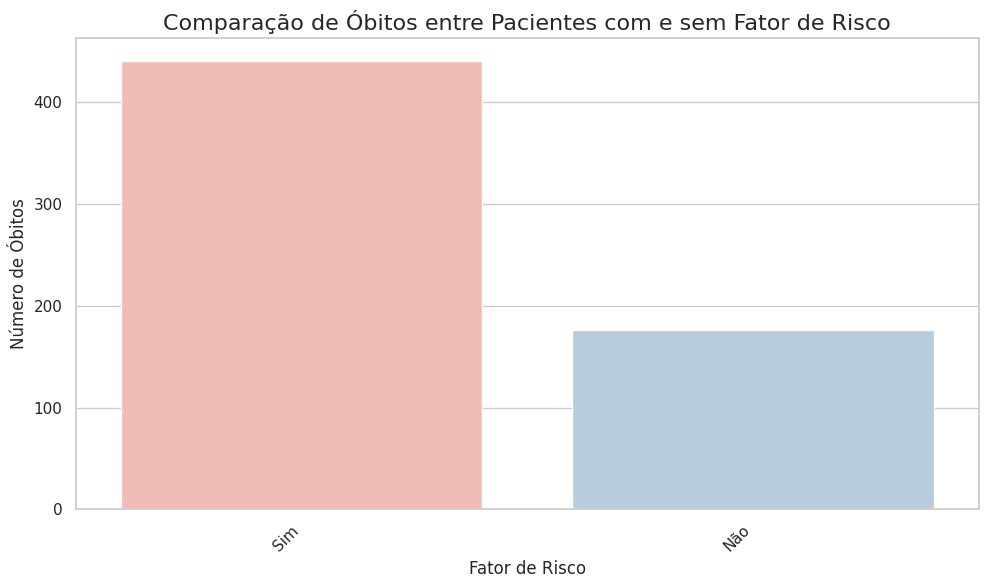

In [57]:
# Criando um gráfico de barras que compara os fatores de risco com o número de óbitos

# Criar o gráfico de contagem
configurar_grafico('Comparação de Óbitos entre Pacientes com e sem Fator de Risco',
                    'Fator de Risco',
                    'Número de Óbitos')

sns.countplot(data=df_obito, x='FATOR_RISC', palette='Pastel1')

# Exibindo o gráfico
plt.show()

A análise do gráfico indica que a maioria dos óbitos está concentrada entre pacientes que apresentavam fatores de risco, sugerindo uma correlação significativa entre a presença de condições pré-existentes e a gravidade dos desfechos.

<ipython-input-58-c2b7e21355a9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=riscos_obitos.index, y=riscos_obitos.values, palette='Reds_r')


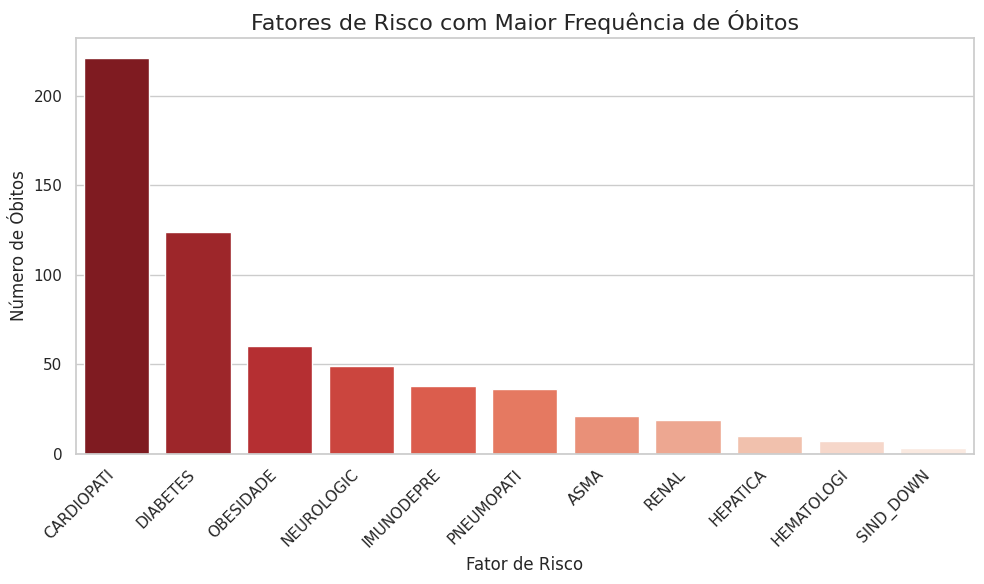

In [58]:
# Contando a frequência de 'Sim' para cada fator de risco entre os óbitos
riscos_obitos = df_obito[colunas_riscos].apply(lambda x: (x == 'Sim').sum())
riscos_obitos = riscos_obitos.sort_values(ascending=False)

# Criando o gráfico de barras
configurar_grafico('Fatores de Risco com Maior Frequência de Óbitos',
                    'Fator de Risco',
                    'Número de Óbitos')

# Criando o gráfico de barras
sns.barplot(x=riscos_obitos.index, y=riscos_obitos.values, palette='Reds_r')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A análise do gráfico revela que as principais condições de risco associadas ao aumento do número de óbitos são a cardiopatia, diabetes e obesidade, seguidas por problemas neurológicos. Essa mudança em relação ao gráfico anterior, onde a asma ocupava o terceiro lugar, destaca a importância de considerar como diferentes fatores de risco podem afetar desfechos clínicos de maneira variável. A obesidade, ao aparecer entre os principais fatores, também indica a necessidade de atenção.

<ipython-input-59-9f2f088271d9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_estados.index, y=top_estados.values, palette='viridis')


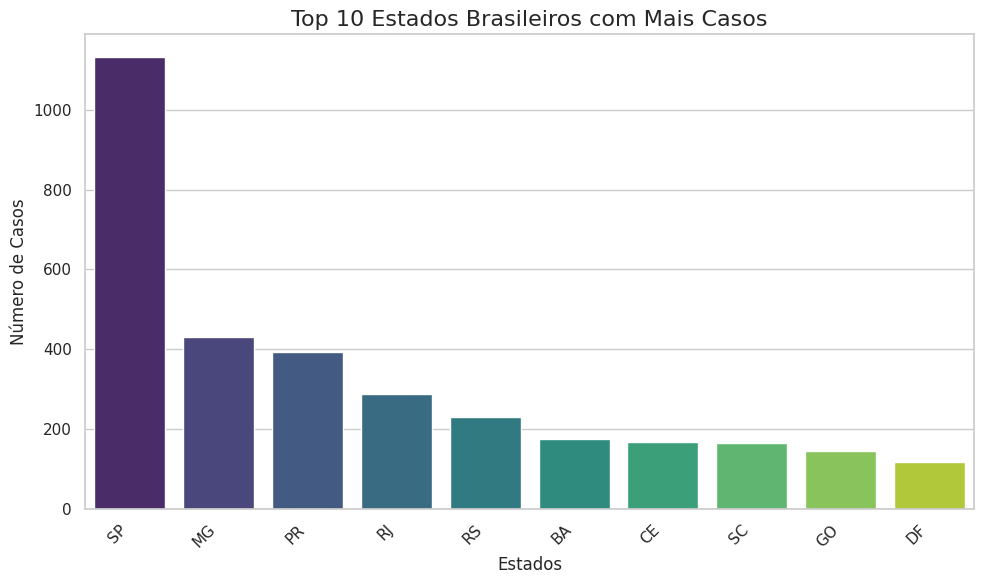

In [59]:
# Gráfico geográfico com os estados com mais casos
# Contando os casos por estado
casos_por_estado = SRAG['SG_UF'].value_counts()

# Selecionando os top 10 estados com mais casos
top_estados = casos_por_estado.nlargest(10)

# Configurando o gráfico
configurar_grafico('Top 10 Estados Brasileiros com Mais Casos',
                    'Estados',
                    'Número de Casos')

# Criando o gráfico de barras com a paleta viridis invertida
sns.barplot(x=top_estados.index, y=top_estados.values, palette='viridis')

plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


A análise do gráfico revela que São Paulo se destaca significativamente como o estado brasileiro com o maior número de casos reportados, apresentando mais do que o dobro dos registros em comparação com os estados seguintes na lista, como Minas Gerais, Paraná e Rio de Janeiro. Essa disparidade pode indicar fatores como a densidade populacional elevada e a extensão da área urbana.

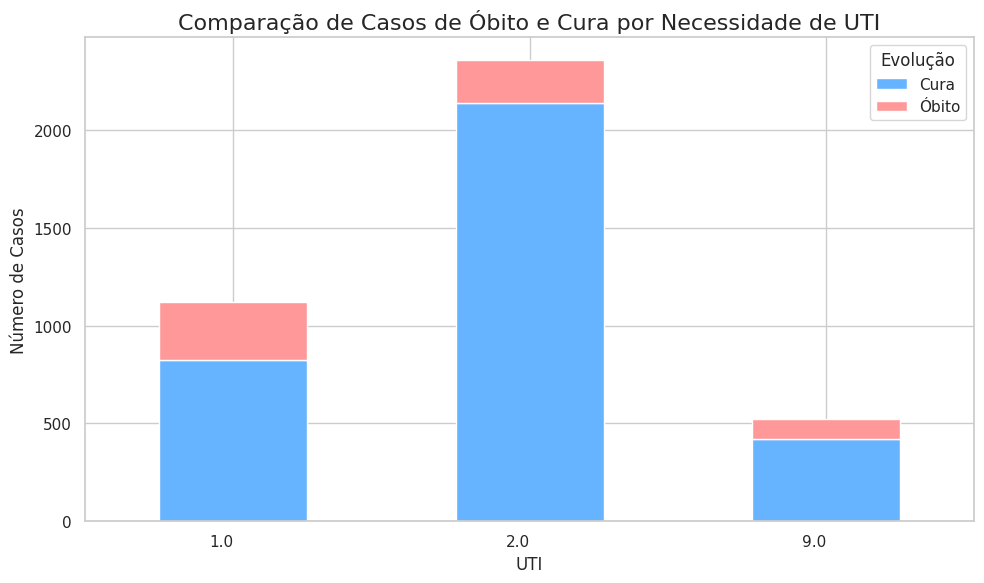

In [60]:
# Criando uma nova coluna para identificar se houve óbito ou cura
SRAG['Evolucao_Status'] = SRAG['EVOLUCAO'].apply(lambda x: 'Óbito' if x == 'Óbito' else 'Cura')

# Agrupando os dados por UTI e Evolução
dados_uti = SRAG.groupby(['UTI', 'Evolucao_Status']).size().unstack(fill_value=0)

# Configurando o gráfico usando a função personalizada
configurar_grafico('Comparação de Casos de Óbito e Cura por Necessidade de UTI',
                   'Necessidade de UTI',
                   'Número de Casos')

# Criando o gráfico de barras empilhadas
dados_uti.plot(kind='bar', stacked=True, color=['#66B3FF','#FF9999'], ax=plt.gca())

# Configurando a legenda
plt.legend(title='Evolução')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

A análise do gráfico de colunas empilhadas que mostra os casos que precisaram de UTI revela que a maioria dos pacientes não precisou de UTI, e a grande parte desses casos resultou em cura, com apenas uma pequena proporção de óbitos. Já na coluna que indica que os pacientes precisaram de UTI, observamos um número menor de casos, mas com uma proporção significativa tanto de curas quanto de óbitos, sendo que a quantidade de óbitos é similar à dos casos que não necessitaram de UTI.

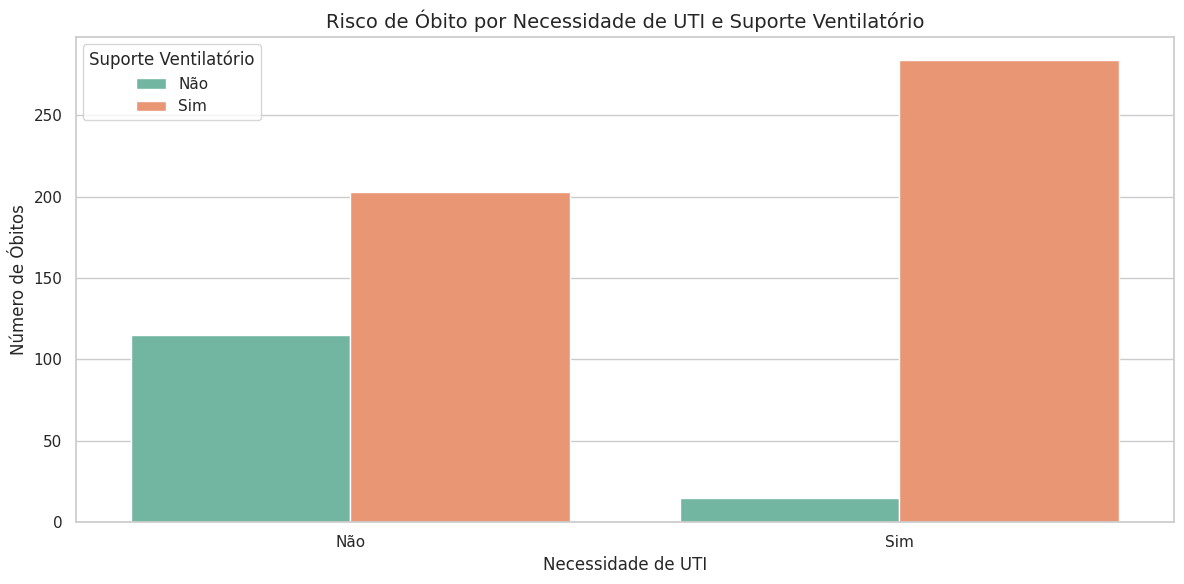

In [61]:
#Pacientes que precisam de UTI ou ventilação mecânica têm maior risco de óbito.
# Substituindo os valores na coluna UTI
SRAG['UTI'] = SRAG['UTI'].replace({
    1: 'Sim',
    2: 'Não',
    9: 'Não'
})

# Substituindo os valores na coluna SUPORT_VEN
SRAG['SUPORT_VEN'] = SRAG['SUPORT_VEN'].replace({
    1: 'Sim',  # Simplificando para 'Sim'
    2: 'Sim',  # Considerando 'Não' como uma categoria
    3: 'Não',  # Este também será tratado como 'Não'
    9: 'Não'
})

# Criando uma nova coluna para contar os óbitos
SRAG['Óbito'] = SRAG['EVOLUCAO'].apply(lambda x: 1 if x == 'Óbito' else 0)

# Contando os óbitos por UTI e SUPORT_VEN
data = SRAG.groupby(['UTI', 'SUPORT_VEN'])['Óbito'].sum().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='UTI', y='Óbito', hue='SUPORT_VEN', palette='Set2')

# Configurando o gráfico
plt.title('Risco de Óbito por Necessidade de UTI e Suporte Ventilatório', fontsize=14)
plt.xlabel('Necessidade de UTI', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.legend(title='Suporte Ventilatório')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

A análise desse gráfico mostra que, entre os casos de óbito, a necessidade de suporte ventilatório foi predominante, especialmente entre aqueles que precisaram de UTI, onde quase todos os pacientes utilizaram suporte ventilatório, e apenas uma pequena parte não o utilizou. Já entre os casos que não precisaram de UTI, houve uma divisão mais equilibrada, mas os óbitos de pacientes que precisaram de suporte ventilatório ainda superaram os que não precisaram. Isso sugere que o uso de suporte ventilatório está fortemente associado à gravidade dos casos, principalmente entre aqueles que necessitaram de internação em UTI.

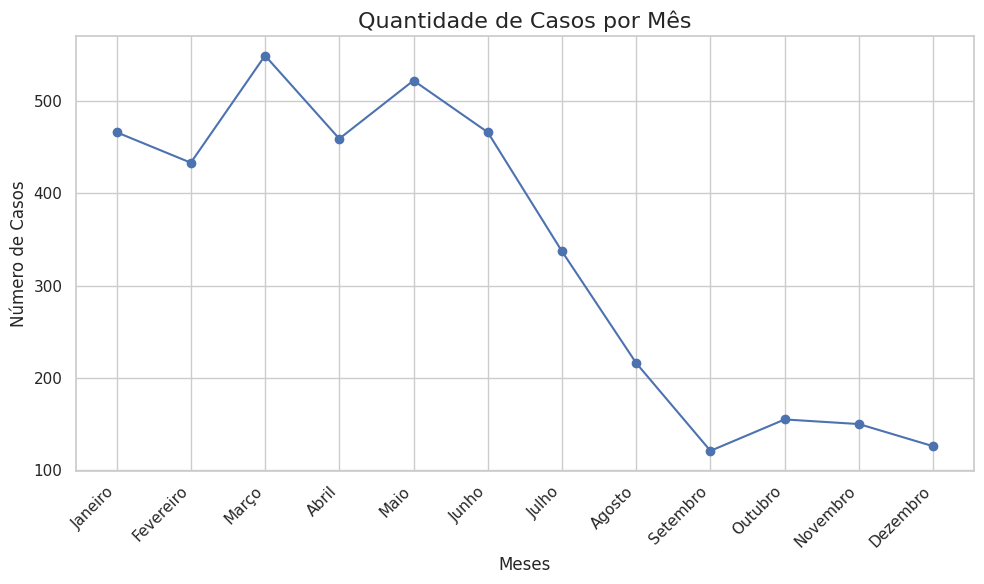

In [62]:
# Meses mais reportados
# Extraindo o mês da coluna de data
SRAG['Mes'] = SRAG['DT_SIN_PRI'].dt.month

# Contando os casos por mês
casos_por_mes = SRAG['Mes'].value_counts().sort_index()

# Configurando o gráfico
configurar_grafico('Quantidade de Casos por Mês',
                    'Meses',
                    'Número de Casos')

# Criando o gráfico de linhas
plt.plot(casos_por_mes.index, casos_por_mes.values, marker='o')

# Configurando os rótulos dos meses
plt.xticks(ticks=range(1, 13), labels=[
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio',
    'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro',
    'Novembro', 'Dezembro'], rotation=45)

# Adicionando a grade
plt.grid(True)

plt.tight_layout()

plt.show()

O gráfico mostra uma alta nos casos no início do ano, com picos em março e abril, seguidos por uma queda acentuada a partir de maio até setembro, quando atinge o ponto mais baixo. Esse padrão sugere um aumento de casos no verão e outono, possivelmente relacionado à maior circulação de pessoas e aglomerações, como festas de fim de ano e Carnaval, enquanto no inverno há uma queda surpreendente, possivelmente devido a medidas de controle, como campanhas de vacinação. A leve recuperação dos casos em outubro e novembro pode estar associada à chegada da primavera.

<ipython-input-66-c092c71510bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obitos['Ano_Evolucao'] = obitos['DT_EVOLUCA'].dt.year
<ipython-input-66-c092c71510bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curas['Ano_Evolucao'] = curas['DT_EVOLUCA'].dt.year


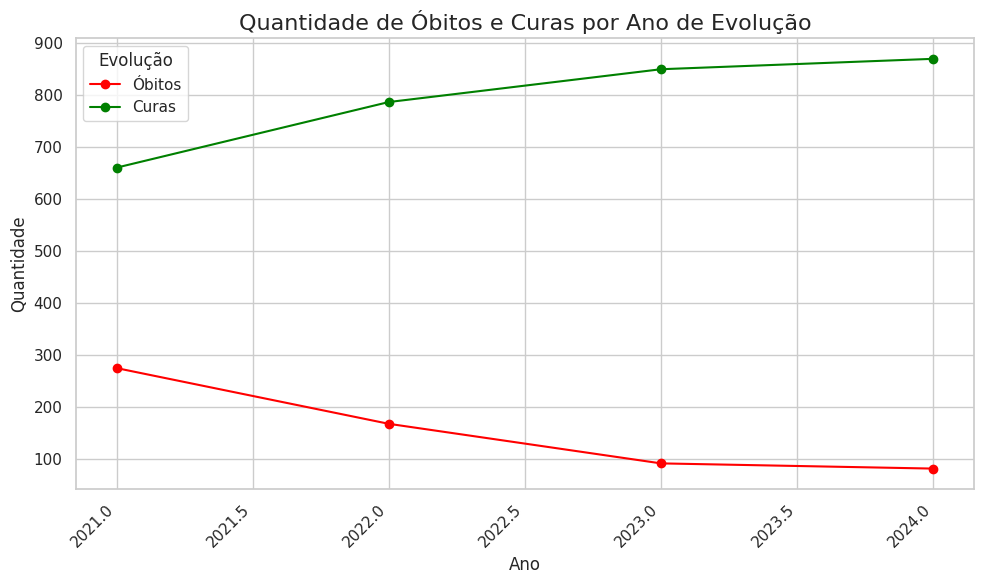

In [66]:
# Ano com mais óbito
# Filtrando os dados
obitos = SRAG[SRAG['EVOLUCAO'] == 'Óbito']
curas = SRAG[SRAG['EVOLUCAO'] == 'Cura']

# Extraindo o ano da coluna DT_EVOLUCA
obitos['Ano_Evolucao'] = obitos['DT_EVOLUCA'].dt.year
curas['Ano_Evolucao'] = curas['DT_EVOLUCA'].dt.year

# Contando os casos por ano
obitos_por_ano = obitos['Ano_Evolucao'].value_counts().sort_index()
curas_por_ano = curas['Ano_Evolucao'].value_counts().sort_index()

# Criando o gráfico

# Configurando o gráfico usando a função personalizada
configurar_grafico('Quantidade de Óbitos e Curas por Ano de Evolução',
                   'Ano',
                   'Quantidade')
plt.plot(obitos_por_ano.index, obitos_por_ano.values, marker='o', label='Óbitos', color='red')
plt.plot(curas_por_ano.index, curas_por_ano.values, marker='o', label='Curas', color='green')

# Configurando a legenda
plt.legend(title='Evolução')

# Adicionando a grade
plt.grid(True)

plt.tight_layout()

# Exibindo o gráfico
plt.show()


O gráfico mostra uma tendência positiva em relação à evolução dos casos de SRAG, com a linha de cura aumentando progressivamente de 2021 a 2024, indicando uma melhoria nos tratamentos e possivelmente no manejo clínico da doença. Em contraste, a linha de óbitos diminui ao longo do mesmo período, sugerindo uma redução na gravidade dos casos ou maior eficácia das intervenções médicas e preventivas, como a vacinação. Esses dados indicam um avanço no controle da doença, com mais pessoas se recuperando e menos óbitos sendo registrados ao longo dos anos.



---

**Obrigada!**

---

